# Project 1: SAT & ACT Analysis

The first markdown cell in a notebook is a great place to provide an overview of your entire project. You will likely want to at least state your

## Problem Statement

The question is what actions can be taken to increase the participation rates among high school students in taking the SAT and ACT college entrance exams? 

as well as an

## Executive Summary

If you want to, it's great to use relative links to direct your audience to various sections of a notebook. **HERE'S A DEMONSTRATION WITH THE CURRENT SECTION HEADERS**:

### Contents:
- [2017 Data Import & Cleaning](#Data-Import-and-Cleaning)
- [2018 Data Import and Cleaning](#2018-Data-Import-and-Cleaning)
- [Exploratory Data Analysis](#Exploratory-Data-Analysis)
- [Data Visualization](#Visualize-the-data)
- [Descriptive and Inferential Statistics](#Descriptive-and-Inferential-Statistics)
- [Outside Research](#Outside-Research)
- [Conclusions and Recommendations](#Conclusions-and-Recommendations)

**If you combine your problem statement, executive summary, data dictionary, and conclusions/recommendations, you have an amazing README.md file that quickly aligns your audience to the contents of your project.** Don't forget to cite your data sources!

*All libraries used should be added here*

In [261]:
# Imports:
import numpy as np
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline


In [262]:
# Set the graph style
sns.set_style("whitegrid")

## 2017 Data Import and Cleaning

#### 1. Read In SAT & ACT  Data

Read in the `sat_2017.csv` and `act_2017.csv` files and assign them to appropriately named pandas dataframes.

In [263]:
# Open the 2017 CSV data files
# Use os.path to get the relative path to data files
abs_datapath = '/Users/stephengodfrey/Documents/SteveSchool/dsi/projects/project_1_Steve_Godfrey/data'
rel_datapath = os.path.relpath(abs_datapath)

SAT_filename = os.path.join(rel_datapath, 'sat_2017.csv')
ACT_filename = os.path.join(rel_datapath, 'act_2017.csv')

SAT_2017_df = pd.read_csv(SAT_filename)
ACT_2017_df = pd.read_csv(ACT_filename)


#### 2. Display Data

Print the first 10 rows of each dataframe to your jupyter notebook

In [264]:
# View SAT scores
SAT_2017_df[:10]


,State,Participation,Evidence-Based Reading and Writing,Math,Total
0,Alabama,5%,593,572,1165
1,Alaska,38%,547,533,1080
2,Arizona,30%,563,553,1116
3,Arkansas,3%,614,594,1208
4,California,53%,531,524,1055
5,Colorado,11%,606,595,1201
6,Connecticut,100%,530,512,1041
7,Delaware,100%,503,492,996
8,District of Columbia,100%,482,468,950
9,Florida,83%,520,497,1017


In [265]:
# View ACT scores
ACT_2017_df[:10]


,State,Participation,English,Math,Reading,Science,Composite
0,National,60%,20.3,20.7,21.4,21.0,21.0
1,Alabama,100%,18.9,18.4,19.7,19.4,19.2
2,Alaska,65%,18.7,19.8,20.4,19.9,19.8
3,Arizona,62%,18.6,19.8,20.1,19.8,19.7
4,Arkansas,100%,18.9,19.0,19.7,19.5,19.4
5,California,31%,22.5,22.7,23.1,22.2,22.8
6,Colorado,100%,20.1,20.3,21.2,20.9,20.8
7,Connecticut,31%,25.5,24.6,25.6,24.6,25.2
8,Delaware,18%,24.1,23.4,24.8,23.6,24.1
9,District of Columbia,32%,24.4,23.5,24.9,23.5,24.2


#### 3. Verbally Describe Data

Take your time looking through the data and thoroughly describe the data in the markdown cell below. 

The 2017 SAT data consist of participation rates and average scores for students taking the SAT test.  States are identified in the State column.  The state-by-state participation rate is in the column labeled 'Participation.'  The score data are averages for the Evidence-Based Reading and Writing and Math sections as well as the Total and are stored in columns with these respective names.  There are data for 50 states and the District of Columbia.

The 2017 ACT data consist of participation rates and average scores for students taking the ACT test.  States are identified in the State column.  The state-by-state participation rate is in the column labeled 'Participation.'  The score data are averages for the English, Math, Reading, Science portions of the test as well as a Composite.  There are data for 50 states, the District of Columbia and a national average.

#### 4a. Does the data look complete? 

The 2017 SAT data contain values for 50 states and the District of Columbia comprising 51 points.  These look complete.   The 2017 ACT data contain values for 50 states, the District of Columbia and a national average comprising 52 data points.  These look complete.

#### 4b. Are there any obvious issues with the observations?

**What is the minimum *possible* value for each test/subtest? What is the maximum *possible* value?**

Consider comparing any questionable values to the sources of your data:
- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

In [266]:
# Look at the maximum and minimum SAT values 
print("Maximum values of each SAT column")
for column in SAT_2017_df.columns:
    print(column, SAT_2017_df[column].max())
    
print("\nMinimum values of each SAT column")
for column in SAT_2017_df.columns:
    print(column, SAT_2017_df[column].min())

print("\nData types\n",SAT_2017_df.dtypes)


Maximum values of each SAT column
State Wyoming
Participation 96%
Evidence-Based Reading and Writing 644
Math 651
Total 1295

Minimum values of each SAT column
State Alabama
Participation 10%
Evidence-Based Reading and Writing 482
Math 52
Total 950

Data types
 State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object


An examination of the minimum and maximum values of each columns in the SAT dataframe reveals some potential data issues that require further investigation.  First, the returned maximum value of 96% and minimum value of 10% for Participation suggests data type problems since a visual inspection of the data set reveals that the maximum should be 100% and the minimum should be 8%.  Second, the range for a total SAT score is between 400 and 1600 with 200 and 800 for each section [(reference)](https://en.wikipedia.org/wiki/SAT).  The returned minimum average Math score of 52 suggests a problem with at least one data point.  The data type of object for the Participation column suggests at least data conversion is required.

In [267]:
# Look at the maximum and minimum ACT values 
print("Maximum values of each ACT column")
for column in ACT_2017_df.columns:
    print(column, ACT_2017_df[column].max())
    
print("\nMinimum values of each ACT column")
for column in ACT_2017_df.columns:
    print(column, ACT_2017_df[column].min())

print("\nData types\n",ACT_2017_df.dtypes)


Maximum values of each ACT column
State Wyoming
Participation 98%
English 25.5
Math 25.3
Reading 26.0
Science 24.9
Composite 25.5

Minimum values of each ACT column
State Alabama
Participation  60%
English 16.3
Math 18.0
Reading 18.1
Science 2.3
Composite 17.8

Data types
 State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object


An examination of the minimum and maximum values of each columns in the ACT dataframe reveals some potential data issues that require further investigation.  First, the returned maximum value of 98% and minimum value of 60% for Participation suggests data type problems since a visual inspection of the data set reveals that the maximum should be 100% and the minimum should be 2%.  Second, while the range for a composite ACT score is between 1 and 36 with ranges of 1 to 36 for the English, Math, Reading and Science sections the 2018 sectional averages were 20.2, 20.5, 21.3 and 20.7 [(reference)](https://en.wikipedia.org/wiki/ACT_(test)).  The returned minimum average Science score of 2.3 suggests at least one data point requires further investigation.  The data type of object for the Participation and Composite columns suggests at least data conversion is required.

#### 4c. Fix any errors you identified

**The data is available** so there's no need to guess or calculate anything. If you didn't find any errors, continue to the next step.

In [268]:
# Fix erroneous values in the data
# https://stackoverflow.com/questions/41217310/get-index-of-a-row-of-a-pandas-dataframe-as-an-integer

# Correct bad data point from 52 to 524
SAT_2017_df.at[SAT_2017_df[SAT_2017_df['State'] == "Maryland"].index[0],'Math'] = 524

# Correct bad data point from 2.3 to 23.2
ACT_2017_df.at[ACT_2017_df[ACT_2017_df['State'] == "Maryland"].index[0],'Science'] = 23.2

# Correct bad data point from 20.2x to 20.2
ACT_2017_df.at[ACT_2017_df[ACT_2017_df['State'] == "Wyoming"].index[0],'Composite'] = 20.2


To validate data each entry for the SAT and ACT 2017 data frames was compared to the corresponding values at the  websites noted above:

- [SAT](https://blog.collegevine.com/here-are-the-average-sat-scores-by-state/)
- [ACT](https://blog.prepscholar.com/act-scores-by-state-averages-highs-and-lows)

This exercise produced the following corrections:  SAT Maryland Math to 524, ACT Maryland Science to 23.2, ACT Wyoming Composite to 20.2. 

#### 5. What are your data types? 
Display the data types of each feature. 

In [269]:
# Dataframe datatypes:
print("SAT Data types\n",SAT_2017_df.dtypes)
print("\n")
print("ACT Data types\n",ACT_2017_df.dtypes)


SAT Data types
 State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object


ACT Data types
 State             object
Participation     object
English          float64
Math             float64
Reading          float64
Science          float64
Composite         object
dtype: object


What did you learn?
- Do any of them seem odd?  
- Which ones are not as they should be?  

In the SAT dataframe, the object types for Participation is odd and should be converted to a Float type.  In the ACT dataframe, the object values for Participation and Composite are odd and should be converted to Float types. 

#### 6. Fix Incorrect Data Types
Based on what you discovered above, use appropriate methods to re-type incorrectly typed data.
- Define a function that will allow you to convert participation rates to an appropriate numeric type. Use `map` or `apply` to change these columns in each dataframe.

In [270]:
# Convert to string, remove %, divide by 100 and convert to float
SAT_2017_df['Participation'] = SAT_2017_df['Participation'].apply(lambda x: float(str(x).replace("%",'')) / 100)

# Convert to string, remove %, divide by 100 and convert to float
ACT_2017_df['Participation'] = ACT_2017_df['Participation'].apply(lambda x: float(str(x).replace("%",'')) / 100)

# Convert to float
ACT_2017_df['Composite'] = ACT_2017_df['Composite'].apply(lambda x: float(x))


- Fix any individual values preventing other columns from being the appropriate type.

- Finish your data modifications by making sure the columns are now typed appropriately.

In [271]:
# Print datatypes
print("\nData types\n",SAT_2017_df.dtypes)
print("Data types\n",ACT_2017_df.dtypes)



Data types
 State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object
Data types
 State             object
Participation    float64
English          float64
Math             float64
Reading          float64
Science          float64
Composite        float64
dtype: object


- Display the data types again to confirm they are correct.

In [272]:
# Look at the maximum and minimum SAT values 
print("Maximum values of each SAT column")
for column in SAT_2017_df.columns:
    print(column, SAT_2017_df[column].max())
    
print("\nMinimum values of each SAT column")
for column in SAT_2017_df.columns:
    print(column, SAT_2017_df[column].min())

print("\n")    
    
# Look at the maximum and minimum ACT values 
print("Maximum values of each ACT column")
for column in ACT_2017_df.columns:
    print(column, ACT_2017_df[column].max())
    
print("\nMinimum values of each ACT column")
for column in ACT_2017_df.columns:
    print(column, ACT_2017_df[column].min())


Maximum values of each SAT column
State Wyoming
Participation 1.0
Evidence-Based Reading and Writing 644
Math 651
Total 1295

Minimum values of each SAT column
State Alabama
Participation 0.02
Evidence-Based Reading and Writing 482
Math 468
Total 950


Maximum values of each ACT column
State Wyoming
Participation 1.0
English 25.5
Math 25.3
Reading 26.0
Science 24.9
Composite 25.5

Minimum values of each ACT column
State Alabama
Participation 0.08
English 16.3
Math 18.0
Reading 18.1
Science 18.2
Composite 17.8


#### 7. Rename Columns
Change the names of the columns to more expressive names so that you can tell the difference the SAT columns and the ACT columns. Your solution should map all column names being changed at once (no repeated singular name-changes). **We will be combining these data with some of the data from 2018, and so you should name columns in an appropriate way**.

**Guidelines**:
- Column names should be all lowercase (you will thank yourself when you start pushing data to SQL later in the course)
- Column names should not contain spaces (underscores will suffice--this allows for using the `df.column_name` method to access columns in addition to `df['column_name']`.
- Column names should be unique and informative (the only feature that we actually share between dataframes is the state).

In [273]:
#code
# Rename columns : State	Participation	Evidence-Based Reading and Writing	Math	Total
SAT_2017_df = SAT_2017_df.rename(index=str, columns={"State": "state",
                                                     "Participation": "sat_part_2017", 
                                                     "Evidence-Based Reading and Writing": "sat_erw_2017",
                                                     "Math": "sat_math_2017",
                                                     "Total": "sat_total_2017"
                                                    })

# Rename columns: State	Participation	English	Math	Reading	Science	Composite
ACT_2017_df = ACT_2017_df.rename(index=str, columns={"State" : "state",
                                                     "Participation": "act_part_2017", 
                                                     "English": "act_eng_2017",
                                                     "Math": "act_math_2017",
                                                     "Reading": "act_read_2017",
                                                     "Science": "act_sci_2017",
                                                     "Composite":"act_comp_2017"
                                                    })                                                    


#### 8. Create a data dictionary

Now that we've fixed our data, and given it appropriate names, let's create a [data dictionary](http://library.ucmerced.edu/node/10249). 

A data dictionary provides a quick overview of features/variables/columns, alongside data types and descriptions. The more descriptive you can be, the more useful this document is.

Example of a Fictional Data Dictionary Entry: 

|Feature|Type|Dataset|Description|
|---|---|---|---|
|**county_pop**|*integer*|2010 census|The population of the county (units in thousands, where 2.5 represents 2500 people).| 
|**per_poverty**|*float*|2010 census|The percent of the county over the age of 18 living below the 200% of official US poverty rate (units percent to two decimal places 98.10 means 98.1%)|

[Here's a quick link to a short guide for formatting markdown in Jupyter notebooks](https://jupyter-notebook.readthedocs.io/en/stable/examples/Notebook/Working%20With%20Markdown%20Cells.html).

Provided is the skeleton for formatting a markdown table, with columns headers that will help you create a data dictionary to quickly summarize your data, as well as some examples. **This would be a great thing to copy and paste into your custom README for this project.**

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|SAT|State of the data| 
|sat_part_2017|float|SAT|State participation rate in 2017|
|sat_erw_2017|integer|SAT|State average Evidence-Based Reading and Writing score in 2017|
|sat_math_2017|integer|SAT|State average Math score in 2017|
|sat_total_2017|integer|SAT|State average Total score in 2017|
|state|object|ACT|State of the data|
|act_part_2017|float|ACT|State participation rate in 2017|
|act_eng_2017|float|ACT|State average English score in 2017|
|act_math_2017|float|ACT|State average Math score in 2017|
|act_read_2017|float|ACT|State average Reading score in 2017|
|act_sci_2017|float|ACT|State average Science score in 2017|
|act_comp_2017|float|ACT|State average Composite score in 2017|


#### 9. Drop unnecessary rows

One of our dataframes contains an extra row. Identify and remove this from the dataframe.

In [274]:
# Drop the national average from the ACT dataframe
ACT_2017_df = ACT_2017_df.drop(ACT_2017_df[ACT_2017_df['state'] == "National"].index[0])


#### 10. Merge Dataframes

Join the 2017 ACT and SAT dataframes using the state in each dataframe as the key. Assign this to a new variable.

In [275]:
# Merge the 2017 ACT and SAT dataframes
# Use an outer join to ensure all data were correctly captured
tests_2017_df = pd.merge(SAT_2017_df, ACT_2017_df, how = "outer", on = "state")

# Use describe to view the resulting array
tests_2017_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_part_2017,51.0,0.398039,0.352766,0.02,0.04,0.38,0.66,1.0
sat_erw_2017,51.0,569.117647,45.666901,482.00,533.50,559.00,613.00,644.0
sat_math_2017,51.0,556.882353,47.121395,468.00,523.50,548.00,599.00,651.0
sat_total_2017,51.0,1126.098039,92.494812,950.00,1055.50,1107.00,1212.00,1295.0
act_part_2017,51.0,0.652549,0.321408,0.08,0.31,0.69,1.00,1.0
act_eng_2017,51.0,20.931373,2.353677,16.30,19.00,20.70,23.30,25.5
act_math_2017,51.0,21.182353,1.981989,18.00,19.40,20.90,23.10,25.3
act_read_2017,51.0,22.013725,2.067271,18.10,20.45,21.80,24.15,26.0
act_sci_2017,51.0,21.450980,1.739353,18.20,19.95,21.30,23.20,24.9
act_comp_2017,51.0,21.519608,2.020695,17.80,19.80,21.40,23.60,25.5


In [276]:
# View the resulting dataframe
tests_2017_df.head()


,state,sat_part_2017,sat_erw_2017,sat_math_2017,sat_total_2017,act_part_2017,act_eng_2017,act_math_2017,act_read_2017,act_sci_2017,act_comp_2017
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,19.8
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,19.7
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4
4,California,0.53,531,524,1055,0.31,22.5,22.7,23.1,22.2,22.8


#### 11. Save your cleaned, merged dataframe

Use a relative path to save out your data as `combined_2017.csv`.

In [277]:
# Save the test_dataframe to a file
comb_filename = os.path.join(rel_datapath, 'combined_2017.csv')
tests_2017_df.to_csv(comb_filename)

## 2018 Data Import and Cleaning

Links to the 2018 ACT and SAT data are provided in the README. These data live in PDFs, and so you'll get to enjoy practicing some *manual* data collection. Save these data as a CSV in your `data` directory, and import, explore, and clean these data in the same way you did above. **Make sure you comment on your steps so it is clear *why* you are doing each process**.

The following steps will be followed to import and clean the 2018 data:
1. Import data from CSV
2. Examine the maximum and minimum of each column in the resulting dataframes
3. Examine the datatypes
4. Convert datatypes as needed
5. Add to the data dictionary

In [278]:
# Load the 2018 ACT and SAT data
SAT_filename_2018 = os.path.join(rel_datapath, '2018 Testing Data - SAT 2018.csv')
ACT_filename_2018 = os.path.join(rel_datapath, '2018 Testing Data - ACT 2018.csv')

SAT_2018_df = pd.read_csv(SAT_filename_2018)
ACT_2018_df = pd.read_csv(ACT_filename_2018)

Examine the minimum, maximum and datatypes for both dataframes.

In [279]:
# Look at the maximum and minimum SAT values 
print("Maximum values of each SAT column")
for column in SAT_2018_df.columns:
    print(column, SAT_2018_df[column].max())
    
print("\nMinimum values of each SAT column")
for column in SAT_2018_df.columns:
    print(column, SAT_2018_df[column].min())

print("\n",SAT_2018_df.dtypes)    
    
print("\n")    
    
# Look at the maximum and minimum ACT values 
print("Maximum values of each ACT column")
for column in ACT_2018_df.columns:
    print(column, ACT_2018_df[column].max())
    
print("\nMinimum values of each ACT column")
for column in ACT_2018_df.columns:
    print(column, ACT_2018_df[column].min())

print("\n", ACT_2018_df.dtypes)  
    

Maximum values of each SAT column
State Wyoming
Participation 99%
Evidence-Based Reading and Writing 643
Math 655
Total 1298

Minimum values of each SAT column
State Alabama
Participation 10%
Evidence-Based Reading and Writing 497
Math 480
Total 977

 State                                 object
Participation                         object
Evidence-Based Reading and Writing     int64
Math                                   int64
Total                                  int64
dtype: object


Maximum values of each ACT column
State Wyoming
Participation 99%
Composite 25.6

Minimum values of each ACT column
State Alabama
Participation 100%
Composite 17.7

 State             object
Participation     object
Composite        float64
dtype: object


Convert the datatypes.

In [280]:
# Convert participation data by stripping %, converting to float and dividing by 100
SAT_2018_df["Participation"] = SAT_2018_df["Participation"].apply(lambda x: float(str(x).replace("%",'')) / 100)
ACT_2018_df["Participation"] = ACT_2018_df["Participation"].apply(lambda x: float(str(x).replace("%",'')) / 100)

In [281]:
# Look at the maximum and minimum SAT values 
print("Maximum values of each SAT column")
for column in SAT_2018_df.columns:
    print(column, SAT_2018_df[column].max())
    
print("\nMinimum values of each SAT column")
for column in SAT_2018_df.columns:
    print(column, SAT_2018_df[column].min())

print("\n",SAT_2018_df.dtypes)    
    
print("\n")    
    
# Look at the maximum and minimum ACT values 
print("Maximum values of each ACT column")
for column in ACT_2018_df.columns:
    print(column, ACT_2018_df[column].max())
    
print("\nMinimum values of each ACT column")
for column in ACT_2018_df.columns:
    print(column, ACT_2018_df[column].min())

print("\n", ACT_2018_df.dtypes)  

Maximum values of each SAT column
State Wyoming
Participation 1.0
Evidence-Based Reading and Writing 643
Math 655
Total 1298

Minimum values of each SAT column
State Alabama
Participation 0.02
Evidence-Based Reading and Writing 497
Math 480
Total 977

 State                                  object
Participation                         float64
Evidence-Based Reading and Writing      int64
Math                                    int64
Total                                   int64
dtype: object


Maximum values of each ACT column
State Wyoming
Participation 1.0
Composite 25.6

Minimum values of each ACT column
State Alabama
Participation 0.07
Composite 17.7

 State             object
Participation    float64
Composite        float64
dtype: object


Rename the columns

In [282]:
SAT_2018_df = SAT_2018_df.rename (columns = {"State": "state",
                                             "Participation": "sat_part_2018",
                                             "Evidence-Based Reading and Writing": "sat_erw_2018",
                                             "Math": "sat_math_2018",
                                             "Total": "sat_total_2018"
                                            })
                                             
ACT_2018_df = ACT_2018_df.rename (columns = {"State": "state",
                                             "Participation": "act_part_2018",
                                             "Composite": "act_comp_2018"
                                            })


Drop the National line item from the ACT dataframe.

In [283]:
# Drop the National row from the ACT dataframe
ACT_2018_df = ACT_2018_df.drop(ACT_2018_df[ACT_2018_df["state"]=="National"].index[0])

#### Combine your 2017 and 2018 data into a single dataframe
Joining on state names should work, assuming you formatted all your state names identically. Make sure none of your columns (other than state) have identical names. Do yourself a favor and decide if you're encoding participation rates as floats or integers and standardize this across your datasets.

Save the contents of this merged dataframe as `final.csv`.

**Use this combined dataframe for the remainder of the project**.

In [284]:
# Combine the 2017 and 2018 data into a single dataframe for both tests covering both years
tests_2018_df = pd.merge(SAT_2018_df, ACT_2018_df, how='outer', on = "state")
tests_2018_df

,state,sat_part_2018,sat_erw_2018,sat_math_2018,sat_total_2018,act_part_2018,act_comp_2018
0,Alabama,0.06,595.0,571.0,1166.0,1.00,19.1
1,Alaska,0.43,562.0,544.0,1106.0,0.33,20.8
2,Arizona,0.29,577.0,572.0,1149.0,0.66,19.2
3,Arkansas,0.05,592.0,576.0,1169.0,1.00,19.4
4,California,0.60,540.0,536.0,1076.0,0.27,22.7
5,Colorado,1.00,519.0,506.0,1025.0,0.30,23.9
6,Connecticut,1.00,535.0,519.0,1053.0,0.26,25.6
7,Delaware,1.00,505.0,492.0,998.0,0.17,23.8
8,District of Columbia,0.92,497.0,480.0,977.0,NaN,NaN
9,Florida,0.97,522.0,493.0,1014.0,0.66,19.9


As a result of this outer join, a couple data discrepencies were identified:
* Washington, D.C. was used to identify the District of Columbia in the ACT_2018_df
* Oklahoma was misspelled in the SAT_2018_df

Corrections were made to these two entries and a new merge was performed.

In [285]:
# Correct District of Columbia in the ACT_2018_df dataframe
ACT_2018_df.at[ACT_2018_df[ACT_2018_df["state"] == "Washington, D.C."].index[0], "state"] = "District of Columbia"

# Correct Okalahoma in the ACT_2018_df dataframe
SAT_2018_df.at[SAT_2018_df[SAT_2018_df["state"] == "Oaklahoma"].index[0],"state"] = "Oklahoma"

In [286]:
# Merge the SAT_2018_df and ACT_2018_df dataframes
tests_2018_df = pd.merge(SAT_2018_df, ACT_2018_df, how = "outer", on = "state")
tests_2018_df

,state,sat_part_2018,sat_erw_2018,sat_math_2018,sat_total_2018,act_part_2018,act_comp_2018
0,Alabama,0.06,595,571,1166,1.00,19.1
1,Alaska,0.43,562,544,1106,0.33,20.8
2,Arizona,0.29,577,572,1149,0.66,19.2
3,Arkansas,0.05,592,576,1169,1.00,19.4
4,California,0.60,540,536,1076,0.27,22.7
5,Colorado,1.00,519,506,1025,0.30,23.9
6,Connecticut,1.00,535,519,1053,0.26,25.6
7,Delaware,1.00,505,492,998,0.17,23.8
8,District of Columbia,0.92,497,480,977,0.32,23.6
9,Florida,0.97,522,493,1014,0.66,19.9


Combine the 2018 and 2017 tests dataframes into a single data frame.  Save this to the data folder.

In [287]:
# Combine the two tests dataframes into a single dataframe
final_df = pd.merge(tests_2017_df, tests_2018_df, on = "state")

# Save the data to a CSV file in the data folder
final_filename = os.path.join(rel_datapath, "final.csv")
final_df.to_csv(final_filename)


Update the data dictionary.

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|final|State of the data| 
|sat_part_2017|float|final|State participation rate for the SAT in 2017|
|sat_erw_2017|integer|final|State average SAT Evidence-Based Reading and Writing score in 2017|
|sat_math_2017|integer|final|State average SAT Math score in 2017|
|sat_total_2017|integer|final|State average SAT Total score in 2017|
|act_part_2017|float|final|State participation rate for the ACT in 2017|
|act_eng_2017|float|final|State average ACT English score in 2017|
|act_math_2017|float|final|State average ACT Math score in 2017|
|act_read_2017|float|final|State average ACT Reading score in 2017|
|act_sci_2017|float|final|State average ACT Science score in 2017|
|act_comp_2017|float|final|State average ACT Composite score in 2017|
|sat_part_2018|float|final|State participation rate for the SAT in 2018|
|sat_erw_2018|integer|final|State average SAT Evidence-Based Reading and Writing score in 2018|
|sat_math_2018|integer|final|State average SAT Math score in 2018|
|sat_total_2018|integer|final|State average SAT Total score in 2018|
|act_part_2018|float|final|State participation rate for the ACT in 2018|
|act_comp_2018|float|final|State average ACT Composite score in 2018|

## Exploratory Data Analysis


### Summary Statistics
Transpose the output of pandas `describe` method to create a quick overview of each numeric feature.

In [288]:
#Code:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_part_2017,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.0
sat_erw_2017,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.0
sat_math_2017,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.0
sat_total_2017,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.0
act_part_2017,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.0
act_eng_2017,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.5
act_math_2017,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.3
act_read_2017,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.0
act_sci_2017,51.0,21.450980,1.739353,18.20,19.950,21.30,23.200,24.9
act_comp_2017,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.5


#### Manually calculate standard deviation

$$\sigma = \sqrt{\frac{1}{n}\sum_{i=1}^n(x_i - \mu)^2}$$

- Write a function to calculate standard deviation using the formula above

In [289]:
# Standard deviation function
def std_dev(x_v):
    # Exit function if len (x_v) is less than 1
    if len(x_v) < 1:
        return 0
    
    # Calculate the mean of x_v
    sum = 0.0
    count = 0.0
    for x in x_v:
        sum += x
        count += 1
    mean = sum / count
    
    # Calculate the sum of square difference from the mean
    sumsq = 0.0
    for x in x_v:
        sumsq += (x - mean)**2
        
    # Return the square root of the average square difference
    return (sumsq / (count-1)) ** (.5)


- Use a **dictionary comprehension** to apply your standard deviation function to each numeric column in the dataframe.  **No loops**  
- Assign the output to variable `sd` as a dictionary where: 
    - Each column name is now a key 
    - That standard deviation of the column is the value 
     
*Example Output :* `{'ACT_Math': 120, 'ACT_Reading': 120, ...}`

In [290]:
# Use a dictionary comprhension to store the standard deviations of the numeric columns
# https://stackoverflow.com/questions/43068412/retrieve-name-of-column-from-its-index-in-pandas
sd = {x: std_dev(final_df[x]) for x in final_df.columns if final_df[x].dtypes != object}
sd


{'sat_part_2017': 0.35276632270013036,
 'sat_erw_2017': 45.66690138768932,
 'sat_math_2017': 47.12139516560329,
 'sat_total_2017': 92.49481172519046,
 'act_part_2017': 0.32140842015886834,
 'act_eng_2017': 2.35367713980303,
 'act_math_2017': 1.9819894936505533,
 'act_read_2017': 2.0672706264873146,
 'act_sci_2017': 1.7393530462812443,
 'act_comp_2017': 2.020694891154341,
 'sat_part_2018': 0.380141872380898,
 'sat_erw_2018': 45.31767607353539,
 'sat_math_2018': 48.887562073498785,
 'sat_total_2018': 93.84454396166325,
 'act_part_2018': 0.3408097623567245,
 'act_comp_2018': 2.117686492007581}

Do your manually calculated standard deviations match up with the output from pandas `describe`? What about numpy's `std` method?

With an adjustment to the standard deviation formula to calculate the standard deviation of a sample rather than the standard deviation of the population, the results match those produced by Pandas describe method.  The adjusted formula is given by the following:

$$\sigma = \sqrt{\frac{1}{n-1}\sum_{i=1}^n(x_i - \mu)^2}$$

#### Investigate trends in the data
Using sorting and/or masking (along with the `.head` method to not print our entire dataframe), consider the following questions:

- Which states have the highest and lowest participation rates for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Which states have the highest and lowest mean total/composite scores for the:
    - 2017 SAT?
    - 2018 SAT?
    - 2017 ACT?
    - 2018 ACT?
- Do any states with 100% participation on a given test have a rate change year-to-year?
- Do any states show have >50% participation on *both* tests either year?

Based on what you've just observed, have you identified any states that you're especially interested in? **Make a note of these and state *why* you think they're interesting**.

**You should comment on your findings at each step in a markdown cell below your code block**. Make sure you include at least one example of sorting your dataframe by a column, and one example of using boolean filtering (i.e., masking) to select a subset of the dataframe.

In [291]:
# Sort by highest SAT 2017 participation
final_df.sort_values('sat_part_2017', ascending = False).head()


,state,sat_part_2017,sat_erw_2017,sat_math_2017,sat_total_2017,act_part_2017,act_eng_2017,act_math_2017,act_read_2017,act_sci_2017,act_comp_2017,sat_part_2018,sat_erw_2018,sat_math_2018,sat_total_2018,act_part_2018,act_comp_2018
8,District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,24.2,0.92,497,480,977,0.32,23.6
22,Michigan,1.00,509,495,1005,0.29,24.1,23.7,24.5,23.8,24.1,1.00,511,499,1011,0.22,24.4
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2,1.00,535,519,1053,0.26,25.6
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1,1.00,505,492,998,0.17,23.8
29,New Hampshire,0.96,532,520,1052,0.18,25.4,25.1,26.0,24.9,25.5,0.96,535,528,1063,0.16,25.1


In [292]:
# Sort by highest SAT 2017 participation
final_df.sort_values('sat_part_2018', ascending = False).head(7)


,state,sat_part_2017,sat_erw_2017,sat_math_2017,sat_total_2017,act_part_2017,act_eng_2017,act_math_2017,act_read_2017,act_sci_2017,act_comp_2017,sat_part_2018,sat_erw_2018,sat_math_2018,sat_total_2018,act_part_2018,act_comp_2018
5,Colorado,0.11,606,595,1201,1.00,20.1,20.3,21.2,20.9,20.8,1.00,519,506,1025,0.30,23.9
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,25.2,1.00,535,519,1053,0.26,25.6
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1,1.00,505,492,998,0.17,23.8
22,Michigan,1.00,509,495,1005,0.29,24.1,23.7,24.5,23.8,24.1,1.00,511,499,1011,0.22,24.4
12,Idaho,0.93,513,493,1005,0.38,21.9,21.8,23.0,22.1,22.3,1.00,508,493,1001,0.36,22.3
19,Maine,0.95,513,499,1012,0.08,24.2,24.0,24.8,23.7,24.3,0.99,512,501,1013,0.07,24.0
13,Illinois,0.09,559,556,1115,0.93,21.0,21.2,21.6,21.3,21.4,0.99,513,506,1019,0.43,23.9


In [293]:
# Sort by lowest SAT 2017 participation
final_df.sort_values('sat_part_2017', ascending = True).head()


,state,sat_part_2017,sat_erw_2017,sat_math_2017,sat_total_2017,act_part_2017,act_eng_2017,act_math_2017,act_read_2017,act_sci_2017,act_comp_2017,sat_part_2018,sat_erw_2018,sat_math_2018,sat_total_2018,act_part_2018,act_comp_2018
34,North Dakota,0.02,635,621,1256,0.98,19.0,20.4,20.5,20.6,20.3,0.02,640,643,1283,0.98,20.3
24,Mississippi,0.02,634,607,1242,1.00,18.2,18.1,18.8,18.8,18.6,0.03,630,606,1236,1.00,18.6
15,Iowa,0.02,641,635,1275,0.67,21.2,21.3,22.6,22.1,21.9,0.03,634,631,1265,0.68,21.8
25,Missouri,0.03,640,631,1271,1.00,19.8,19.9,20.8,20.5,20.4,0.04,633,629,1262,1.00,20.0
44,Utah,0.03,624,614,1238,1.00,19.5,19.9,20.8,20.6,20.3,0.04,618,612,1230,1.00,20.4


In [294]:
# Sort by lowest SAT 2018 participation
final_df.sort_values('sat_part_2018', ascending = True).head()


,state,sat_part_2017,sat_erw_2017,sat_math_2017,sat_total_2017,act_part_2017,act_eng_2017,act_math_2017,act_read_2017,act_sci_2017,act_comp_2017,sat_part_2018,sat_erw_2018,sat_math_2018,sat_total_2018,act_part_2018,act_comp_2018
34,North Dakota,0.02,635,621,1256,0.98,19.0,20.4,20.5,20.6,20.3,0.02,640,643,1283,0.98,20.3
50,Wyoming,0.03,626,604,1230,1.00,19.4,19.8,20.8,20.6,20.2,0.03,633,625,1257,1.00,20.0
41,South Dakota,0.03,612,603,1216,0.80,20.7,21.5,22.3,22.0,21.8,0.03,622,618,1241,0.77,21.9
27,Nebraska,0.03,629,625,1253,0.84,20.9,20.9,21.9,21.5,21.4,0.03,629,623,1252,1.00,20.1
49,Wisconsin,0.03,642,649,1291,1.00,19.7,20.4,20.6,20.9,20.5,0.03,641,653,1294,1.00,20.5


In [295]:
# Get the states with 100% ACT 2017 participation
final_df[final_df["act_part_2017"] == 1.0]


,state,sat_part_2017,sat_erw_2017,sat_math_2017,sat_total_2017,act_part_2017,act_eng_2017,act_math_2017,act_read_2017,act_sci_2017,act_comp_2017,sat_part_2018,sat_erw_2018,sat_math_2018,sat_total_2018,act_part_2018,act_comp_2018
0,Alabama,0.05,593,572,1165,1.0,18.9,18.4,19.7,19.4,19.2,0.06,595,571,1166,1.00,19.1
3,Arkansas,0.03,614,594,1208,1.0,18.9,19.0,19.7,19.5,19.4,0.05,592,576,1169,1.00,19.4
5,Colorado,0.11,606,595,1201,1.0,20.1,20.3,21.2,20.9,20.8,1.00,519,506,1025,0.30,23.9
17,Kentucky,0.04,631,616,1247,1.0,19.6,19.4,20.5,20.1,20.0,0.04,630,618,1248,1.00,20.2
18,Louisiana,0.04,611,586,1198,1.0,19.4,18.8,19.8,19.6,19.5,0.04,615,595,1210,1.00,19.2
23,Minnesota,0.03,644,651,1295,1.0,20.4,21.5,21.8,21.6,21.5,0.04,643,655,1298,0.99,21.3
24,Mississippi,0.02,634,607,1242,1.0,18.2,18.1,18.8,18.8,18.6,0.03,630,606,1236,1.00,18.6
25,Missouri,0.03,640,631,1271,1.0,19.8,19.9,20.8,20.5,20.4,0.04,633,629,1262,1.00,20.0
26,Montana,0.10,605,591,1196,1.0,19.0,20.2,21.0,20.5,20.3,0.10,606,592,1198,1.00,20.0
28,Nevada,0.26,563,553,1116,1.0,16.3,18.0,18.1,18.2,17.8,0.23,574,566,1140,1.00,17.7


In [296]:
# Get the states with 100% ACT 2018 participation
final_df[final_df["act_part_2018"] == 1.0]


,state,sat_part_2017,sat_erw_2017,sat_math_2017,sat_total_2017,act_part_2017,act_eng_2017,act_math_2017,act_read_2017,act_sci_2017,act_comp_2017,sat_part_2018,sat_erw_2018,sat_math_2018,sat_total_2018,act_part_2018,act_comp_2018
0,Alabama,0.05,593,572,1165,1.00,18.9,18.4,19.7,19.4,19.2,0.06,595,571,1166,1.0,19.1
3,Arkansas,0.03,614,594,1208,1.00,18.9,19.0,19.7,19.5,19.4,0.05,592,576,1169,1.0,19.4
17,Kentucky,0.04,631,616,1247,1.00,19.6,19.4,20.5,20.1,20.0,0.04,630,618,1248,1.0,20.2
18,Louisiana,0.04,611,586,1198,1.00,19.4,18.8,19.8,19.6,19.5,0.04,615,595,1210,1.0,19.2
24,Mississippi,0.02,634,607,1242,1.00,18.2,18.1,18.8,18.8,18.6,0.03,630,606,1236,1.0,18.6
25,Missouri,0.03,640,631,1271,1.00,19.8,19.9,20.8,20.5,20.4,0.04,633,629,1262,1.0,20.0
26,Montana,0.10,605,591,1196,1.00,19.0,20.2,21.0,20.5,20.3,0.10,606,592,1198,1.0,20.0
27,Nebraska,0.03,629,625,1253,0.84,20.9,20.9,21.9,21.5,21.4,0.03,629,623,1252,1.0,20.1
28,Nevada,0.26,563,553,1116,1.00,16.3,18.0,18.1,18.2,17.8,0.23,574,566,1140,1.0,17.7
33,North Carolina,0.49,546,535,1081,1.00,17.8,19.3,19.6,19.3,19.1,0.52,554,543,1097,1.0,19.1


In [297]:
# Sort by lowest ACT 2018 participation
final_df.sort_values('act_part_2018', ascending = True).head()


,state,sat_part_2017,sat_erw_2017,sat_math_2017,sat_total_2017,act_part_2017,act_eng_2017,act_math_2017,act_read_2017,act_sci_2017,act_comp_2017,sat_part_2018,sat_erw_2018,sat_math_2018,sat_total_2018,act_part_2018,act_comp_2018
19,Maine,0.95,513,499,1012,0.08,24.2,24.0,24.8,23.7,24.3,0.99,512,501,1013,0.07,24.0
39,Rhode Island,0.71,539,524,1062,0.21,24.0,23.3,24.7,23.4,24.0,0.97,513,505,1018,0.15,24.2
29,New Hampshire,0.96,532,520,1052,0.18,25.4,25.1,26.0,24.9,25.5,0.96,535,528,1063,0.16,25.1
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,24.1,1.00,505,492,998,0.17,23.8
38,Pennsylvania,0.65,540,531,1071,0.23,23.4,23.4,24.2,23.3,23.7,0.70,547,539,1086,0.20,23.5


In the cell below, four new columns have been created to track the change in SAT and ACT participation rates from 2017 to 2018 and to compare the difference in SAT and ACT participation rates for 2017 and 2018.  The data dictionary has bneen updated.

Updated data dictionary.

|Feature|Type|Dataset|Description|
|---|---|---|---|
|state|object|final|State of the data| 
|sat_part_2017|float|final|State participation rate for the SAT in 2017|
|sat_erw_2017|integer|final|State average SAT Evidence-Based Reading and Writing score in 2017|
|sat_math_2017|integer|final|State average SAT Math score in 2017|
|sat_total_2017|integer|final|State average SAT Total score in 2017|
|act_part_2017|float|final|State participation rate for the ACT in 2017|
|act_eng_2017|float|final|State average ACT English score in 2017|
|act_math_2017|float|final|State average ACT Math score in 2017|
|act_read_2017|float|final|State average ACT Reading score in 2017|
|act_sci_2017|float|final|State average ACT Science score in 2017|
|act_comp_2017|float|final|State average ACT Composite score in 2017|
|sat_part_2018|float|final|State participation rate for the SAT in 2018|
|sat_erw_2018|integer|final|State average SAT Evidence-Based Reading and Writing score in 2018|
|sat_math_2018|integer|final|State average SAT Math score in 2018|
|sat_total_2018|integer|final|State average SAT Total score in 2018|
|act_part_2018|float|final|State participation rate for the ACT in 2018|
|act_comp_2018|float|final|State average ACT Composite score in 2018|
|sat_change_part_17_to_18|float|final|2018 less 2017 SAT participation|
|act_change_part_17_to_18|float|final|2018 less 2017 ACT participation|
|sat_act_part_2017|float|final|2017 SAT less 2017 ACT participation|
|sat_act_part_2017|float|final|2018 SAT less 2018 ACT participation|


In [298]:
# Create new columns for the change in SAT and ACT participation rates
final_df['sat_change_part_17_to_18'] = final_df['sat_part_2018'] - final_df['sat_part_2017']
final_df['act_change_part_17_to_18'] = final_df['act_part_2018'] - final_df['act_part_2017']

# Create new columns for the difference in SAT and ACT participation rates
final_df['sat_act_part_2017'] = final_df['sat_part_2017'] - final_df['act_part_2017']
final_df['sat_act_part_2018'] = final_df['sat_part_2018'] - final_df['act_part_2018']


In [299]:
# Get the largest changes in SAT participation
final_df.nlargest(5,'sat_change_part_17_to_18')


,state,sat_part_2017,sat_erw_2017,sat_math_2017,sat_total_2017,act_part_2017,act_eng_2017,act_math_2017,act_read_2017,act_sci_2017,...,sat_part_2018,sat_erw_2018,sat_math_2018,sat_total_2018,act_part_2018,act_comp_2018,sat_change_part_17_to_18,act_change_part_17_to_18,sat_act_part_2017,sat_act_part_2018
13,Illinois,0.09,559,556,1115,0.93,21.0,21.2,21.6,21.3,...,0.99,513,506,1019,0.43,23.9,0.90,-0.50,-0.84,0.56
5,Colorado,0.11,606,595,1201,1.00,20.1,20.3,21.2,20.9,...,1.00,519,506,1025,0.30,23.9,0.89,-0.70,-0.89,0.70
39,Rhode Island,0.71,539,524,1062,0.21,24.0,23.3,24.7,23.4,...,0.97,513,505,1018,0.15,24.2,0.26,-0.06,0.50,0.82
9,Florida,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,...,0.97,522,493,1014,0.66,19.9,0.14,-0.07,0.10,0.31
48,West Virginia,0.14,558,528,1086,0.69,20.0,19.4,21.2,20.5,...,0.28,513,486,999,0.65,20.3,0.14,-0.04,-0.55,-0.37


In [300]:
# Get the biggest declines in SAT participation
final_df.nsmallest(5,'sat_change_part_17_to_18')


,state,sat_part_2017,sat_erw_2017,sat_math_2017,sat_total_2017,act_part_2017,act_eng_2017,act_math_2017,act_read_2017,act_sci_2017,...,sat_part_2018,sat_erw_2018,sat_math_2018,sat_total_2018,act_part_2018,act_comp_2018,sat_change_part_17_to_18,act_change_part_17_to_18,sat_act_part_2017,sat_act_part_2018
8,District of Columbia,1.00,482,468,950,0.32,24.4,23.5,24.9,23.5,...,0.92,497,480,977,0.32,23.6,-0.08,0.00,0.68,0.60
28,Nevada,0.26,563,553,1116,1.00,16.3,18.0,18.1,18.2,...,0.23,574,566,1140,1.00,17.7,-0.03,0.00,-0.74,-0.77
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,...,0.29,577,572,1149,0.66,19.2,-0.01,0.04,-0.32,-0.37
6,Connecticut,1.00,530,512,1041,0.31,25.5,24.6,25.6,24.6,...,1.00,535,519,1053,0.26,25.6,0.00,-0.05,0.69,0.74
7,Delaware,1.00,503,492,996,0.18,24.1,23.4,24.8,23.6,...,1.00,505,492,998,0.17,23.8,0.00,-0.01,0.82,0.83


In [301]:
# Get the largest changes in ACT participation
final_df.nlargest(5,'act_change_part_17_to_18')


,state,sat_part_2017,sat_erw_2017,sat_math_2017,sat_total_2017,act_part_2017,act_eng_2017,act_math_2017,act_read_2017,act_sci_2017,...,sat_part_2018,sat_erw_2018,sat_math_2018,sat_total_2018,act_part_2018,act_comp_2018,sat_change_part_17_to_18,act_change_part_17_to_18,sat_act_part_2017,sat_act_part_2018
35,Ohio,0.12,578,570,1149,0.75,21.2,21.6,22.5,22.0,...,0.18,552,547,1099,1.00,20.3,0.06,0.25,-0.63,-0.82
27,Nebraska,0.03,629,625,1253,0.84,20.9,20.9,21.9,21.5,...,0.03,629,623,1252,1.00,20.1,0.00,0.16,-0.81,-0.97
2,Arizona,0.30,563,553,1116,0.62,18.6,19.8,20.1,19.8,...,0.29,577,572,1149,0.66,19.2,-0.01,0.04,-0.32,-0.37
20,Maryland,0.69,536,524,1060,0.28,23.3,23.1,24.2,23.2,...,0.76,545,535,1080,0.31,22.5,0.07,0.03,0.41,0.45
37,Oregon,0.43,560,548,1108,0.40,21.2,21.5,22.4,21.7,...,0.48,564,553,1117,0.42,21.3,0.05,0.02,0.03,0.06


In [302]:
# Get the biggest declines in SAT participation
final_df.nsmallest(5,'act_change_part_17_to_18')


,state,sat_part_2017,sat_erw_2017,sat_math_2017,sat_total_2017,act_part_2017,act_eng_2017,act_math_2017,act_read_2017,act_sci_2017,...,sat_part_2018,sat_erw_2018,sat_math_2018,sat_total_2018,act_part_2018,act_comp_2018,sat_change_part_17_to_18,act_change_part_17_to_18,sat_act_part_2017,sat_act_part_2018
5,Colorado,0.11,606,595,1201,1.00,20.1,20.3,21.2,20.9,...,1.00,519,506,1025,0.30,23.9,0.89,-0.70,-0.89,0.70
13,Illinois,0.09,559,556,1115,0.93,21.0,21.2,21.6,21.3,...,0.99,513,506,1019,0.43,23.9,0.90,-0.50,-0.84,0.56
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,...,0.43,562,544,1106,0.33,20.8,0.05,-0.32,-0.27,0.10
22,Michigan,1.00,509,495,1005,0.29,24.1,23.7,24.5,23.8,...,1.00,511,499,1011,0.22,24.4,0.00,-0.07,0.71,0.78
9,Florida,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,...,0.97,522,493,1014,0.66,19.9,0.14,-0.07,0.10,0.31


In [303]:
# Find states where difference between SAT and ACT participation is within 10%
final_df[(final_df['sat_act_part_2018'] >= -.1) & (final_df['sat_act_part_2018'] <= .1)]


,state,sat_part_2017,sat_erw_2017,sat_math_2017,sat_total_2017,act_part_2017,act_eng_2017,act_math_2017,act_read_2017,act_sci_2017,...,sat_part_2018,sat_erw_2018,sat_math_2018,sat_total_2018,act_part_2018,act_comp_2018,sat_change_part_17_to_18,act_change_part_17_to_18,sat_act_part_2017,sat_act_part_2018
1,Alaska,0.38,547,533,1080,0.65,18.7,19.8,20.4,19.9,...,0.43,562,544,1106,0.33,20.8,0.05,-0.32,-0.27,0.10
37,Oregon,0.43,560,548,1108,0.40,21.2,21.5,22.4,21.7,...,0.48,564,553,1117,0.42,21.3,0.05,0.02,0.03,0.06


In [304]:
# Find states with a 100% SAT participation and a yearly change
final_df[(final_df['sat_part_2017'] == 1.0) & (final_df['sat_change_part_17_to_18'] != 0.0)]


,state,sat_part_2017,sat_erw_2017,sat_math_2017,sat_total_2017,act_part_2017,act_eng_2017,act_math_2017,act_read_2017,act_sci_2017,...,sat_part_2018,sat_erw_2018,sat_math_2018,sat_total_2018,act_part_2018,act_comp_2018,sat_change_part_17_to_18,act_change_part_17_to_18,sat_act_part_2017,sat_act_part_2018
8,District of Columbia,1.0,482,468,950,0.32,24.4,23.5,24.9,23.5,...,0.92,497,480,977,0.32,23.6,-0.08,0.0,0.68,0.6


In [305]:
# Find states with a 100% ACT participation and a yearly change
final_df[(final_df['act_part_2017'] == 1.0) & (final_df['act_change_part_17_to_18'] != 0.0)]


,state,sat_part_2017,sat_erw_2017,sat_math_2017,sat_total_2017,act_part_2017,act_eng_2017,act_math_2017,act_read_2017,act_sci_2017,...,sat_part_2018,sat_erw_2018,sat_math_2018,sat_total_2018,act_part_2018,act_comp_2018,sat_change_part_17_to_18,act_change_part_17_to_18,sat_act_part_2017,sat_act_part_2018
5,Colorado,0.11,606,595,1201,1.0,20.1,20.3,21.2,20.9,...,1.00,519,506,1025,0.30,23.9,0.89,-0.70,-0.89,0.70
23,Minnesota,0.03,644,651,1295,1.0,20.4,21.5,21.8,21.6,...,0.04,643,655,1298,0.99,21.3,0.01,-0.01,-0.97,-0.95


In [306]:
# Find states with > 50% participation on both tests in 2018
final_df[(final_df['sat_part_2018'] >= 0.50) & (final_df['act_part_2018'] >= 0.50)]


,state,sat_part_2017,sat_erw_2017,sat_math_2017,sat_total_2017,act_part_2017,act_eng_2017,act_math_2017,act_read_2017,act_sci_2017,...,sat_part_2018,sat_erw_2018,sat_math_2018,sat_total_2018,act_part_2018,act_comp_2018,sat_change_part_17_to_18,act_change_part_17_to_18,sat_act_part_2017,sat_act_part_2018
9,Florida,0.83,520,497,1017,0.73,19.0,19.4,21.0,19.4,...,0.97,522,493,1014,0.66,19.9,0.14,-0.07,0.10,0.31
10,Georgia,0.61,535,515,1050,0.55,21.0,20.9,22.0,21.3,...,0.70,542,522,1064,0.53,21.4,0.09,-0.02,0.06,0.17
11,Hawaii,0.55,544,541,1085,0.90,17.8,19.2,19.2,19.3,...,0.56,550,549,1099,0.89,18.9,0.01,-0.01,-0.35,-0.33
33,North Carolina,0.49,546,535,1081,1.00,17.8,19.3,19.6,19.3,...,0.52,554,543,1097,1.00,19.1,0.03,0.00,-0.51,-0.48
40,South Carolina,0.50,543,521,1064,1.00,17.5,18.6,19.1,18.9,...,0.55,547,523,1070,1.00,18.3,0.05,0.00,-0.50,-0.45


## Participation rates

In 2018, SAT participation rates varied from 2% in North Dakota to 100% in Colorado, Connecticut, Delaware, Michigan, and Idaho.  Illinois and Colorado saw substantial increases in their participation rates from 2017 to 2018 with Illinois going from 9% to 99% and Colorado from 11% to 100%.  The largest decline was in the District of Columbia which went from a 100% SAT participation in 2017 to 92% in 2017.

In 2018, ACT participation rates varied from 7% in Maine to 100% in 17 states inlcuding Alabama, Arkansas, Kentucky, Louisiana, Mississippi, Missouri, Montana, Nebraska, Nevada, North Carolina, Ohio, Oklahoma, South Carolina, Tennessee, Utah, Wisconsin and Wyoming.  Ohio saw the largest increase in ACT participation from 2017 to 2018 going from 75% to 100%.  Colorado's ACT participation rate declined from 100% to 30% and Illinois from 93% to 43%.

Interesting questions include

* Why is there such a wide range in participation rates across both the SAT and ACT tests?
* Is there a positive or negative correlation between SAT and ACT participation rates?
* Why do states such as Alaska and Oregon have similar SAT and ACT participation rates while other states do not?
* Why are Florida, Georgia, Hawaii, North Carolina and South Carolina the only states with greater than 50% participation on both tests in 2018?
* Why do 17 states have 100% participation in the ACT test?
* Why did Colorado and Illinois see such dramatic shifts away from ACT to SAT testing?


## Visualize the data

There's not a magic bullet recommendation for the right number of plots to understand a given dataset, but visualizing your data is *always* a good idea. Not only does it allow you to quickly convey your findings (even if you have a non-technical audience), it will often reveal trends in your data that escaped you when you were looking only at numbers.

Some recommendations on plotting:
- Plots have titles
- Plots have axis labels
- Plots have appropriate tick labels
- All text is legible in a plot
- Plots demonstrate meaningful and valid relationships
- Plots are interpreted to aid understanding

There is such a thing as too many plots, and there are a *lot* of bad plots. You might make some! (But hopefully not with the guided prompts below).

#### Use Seaborn's heatmap with pandas `.corr()` to visualize correlations between all numeric features

Heatmaps are generally not appropriate for presentations, and should often be excluded from reports as they can be visually overwhelming. **However**, they can be extremely useful in identify relationships of potential interest (as well as identifying potential collinearity before modeling).

*example*:
```python
sns.heatmap(df.corr())
```

Please take time to format your output, adding a title. Look through some of the additional arguments and options. (Axis labels aren't really necessary, as long as the title is informative).

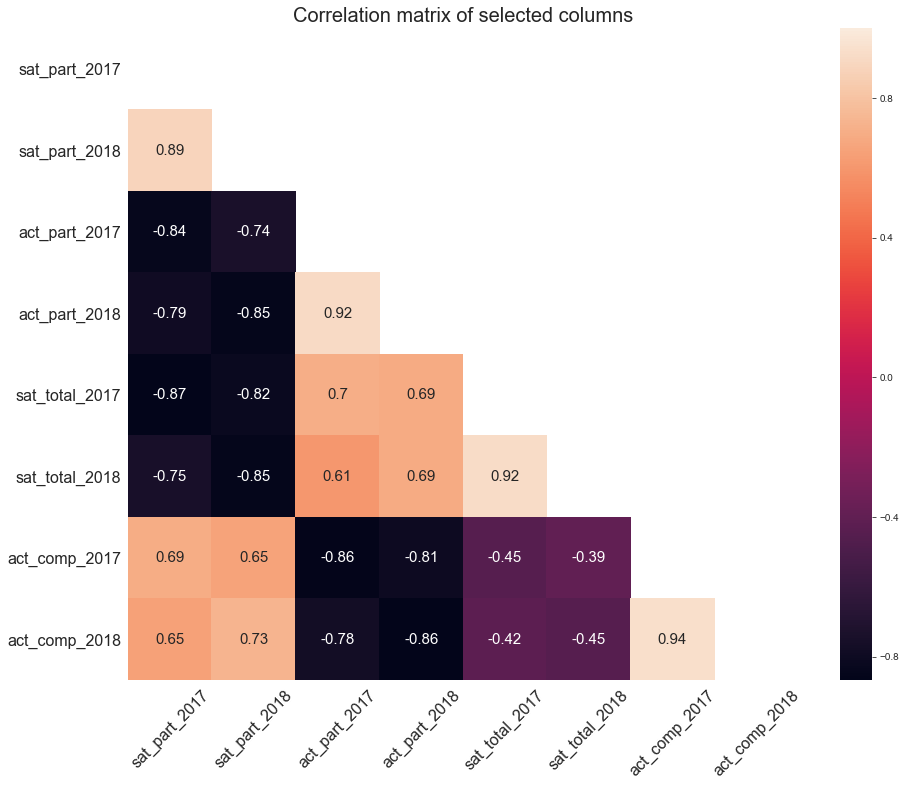

In [358]:
# Specify a subset of just participation rates and total scores
part_df = final_df[["sat_part_2017", "sat_part_2018","act_part_2017","act_part_2018",
                         "sat_total_2017", "sat_total_2018", "act_comp_2017", "act_comp_2018"]]

# Examine correlations of the participation rates and scores
fig = plt.figure(figsize=(15,12))
mask = np.triu(np.ones_like(part_df.corr()))
ax = sns.heatmap(part_df.corr(), 
                 annot = True,
                 annot_kws = {"size" : 15},
                 mask=mask)
ax.set_title("Correlation matrix of selected columns", fontsize = 20)
ax.tick_params(axis="x", rotation = 45, labelsize = 16)
ax.tick_params(axis="y", rotation = 0, labelsize = 16)

## Correlation observations

Some observations about correlations are interesting.  First, the correlation between SAT and ACT participation rates are highly negative at -84% in 2017 and -85% in 2018.   This means that states that have high SAT participation rates tend to have low ACT participation rates and vice versa.

It is also informative to examine the correlations between scores and participation rates.  For the SAT, the correlation between average score and participation was -87% in 2017 and -85% in 2018.  For the ACT, these correlations were -86% and -86% respectively.  This suggests that the higher the participation rate, the lower the average.  This probably occurs because in cases of low participation only highly motivated students are likely to take exams.  High participation rates bring in a wider range of student skills lowering the average.

These two correlation results mean that high positive correlations are observed across test participation rates and scores.  For example, high SAT participation are associated with higher average composite SAT scores (since high SAT participation is associated with low ACT participation and low ACT participation is associated with higher average ACT scores).

#### Define a custom function to subplot histograms

We have data for two tests for two years. We only have composite (and not subtest scores) for the 2018 ACT. We should write a function that will take the names of 2+ columns and subplot histograms. While you can use pandas plotting or Seaborn here, matplotlib gives you greater control over all aspects of your plots.

[Helpful Link for Plotting Multiple Figures](https://matplotlib.org/users/pyplot_tutorial.html#working-with-multiple-figures-and-axes)

Here's some starter code:

In [308]:
# Use provided function with modifications to print histograms
def subplot_histograms(dataframe, list_of_columns, list_of_titles, list_of_xlabels,
                      list_of_ylabels, figsize, bin_cnt):
    # Makes sure you have enough rows
    nrows = int(np.ceil(len(list_of_columns)/2))
    
    # You'll want to specify your figsize
    fig, ax = plt.subplots(nrows=nrows, ncols=2, figsize = figsize)
    
    
    # Ravel turns a matrix into a vector, which is easier to iterate
    ax = ax.ravel()
    
    # Gives us an index value to get into all our lists
    for i, column in enumerate(list_of_columns):
        ax[i].hist(dataframe[column], bins = bin_cnt) # feel free to add more settings
        # Set titles, labels, etc here for each subplot
        ax[i].tick_params(axis="x", labelsize=14)
        ax[i].tick_params(axis="y", labelsize=14)
        ax[i].set_title(list_of_titles[i], fontsize = 20)
        ax[i].set_xlabel(list_of_xlabels[i], fontsize = 16)
        ax[i].set_ylabel(list_of_ylabels[i], fontsize = 16)
        
# reference
# https://github.com/matplotlib/matplotlib/issues/12318

#### Plot and interpret histograms 
For each of the following:
- Participation rates for SAT & ACT
- Math scores for SAT & ACT
- Reading/verbal scores for SAT & ACT

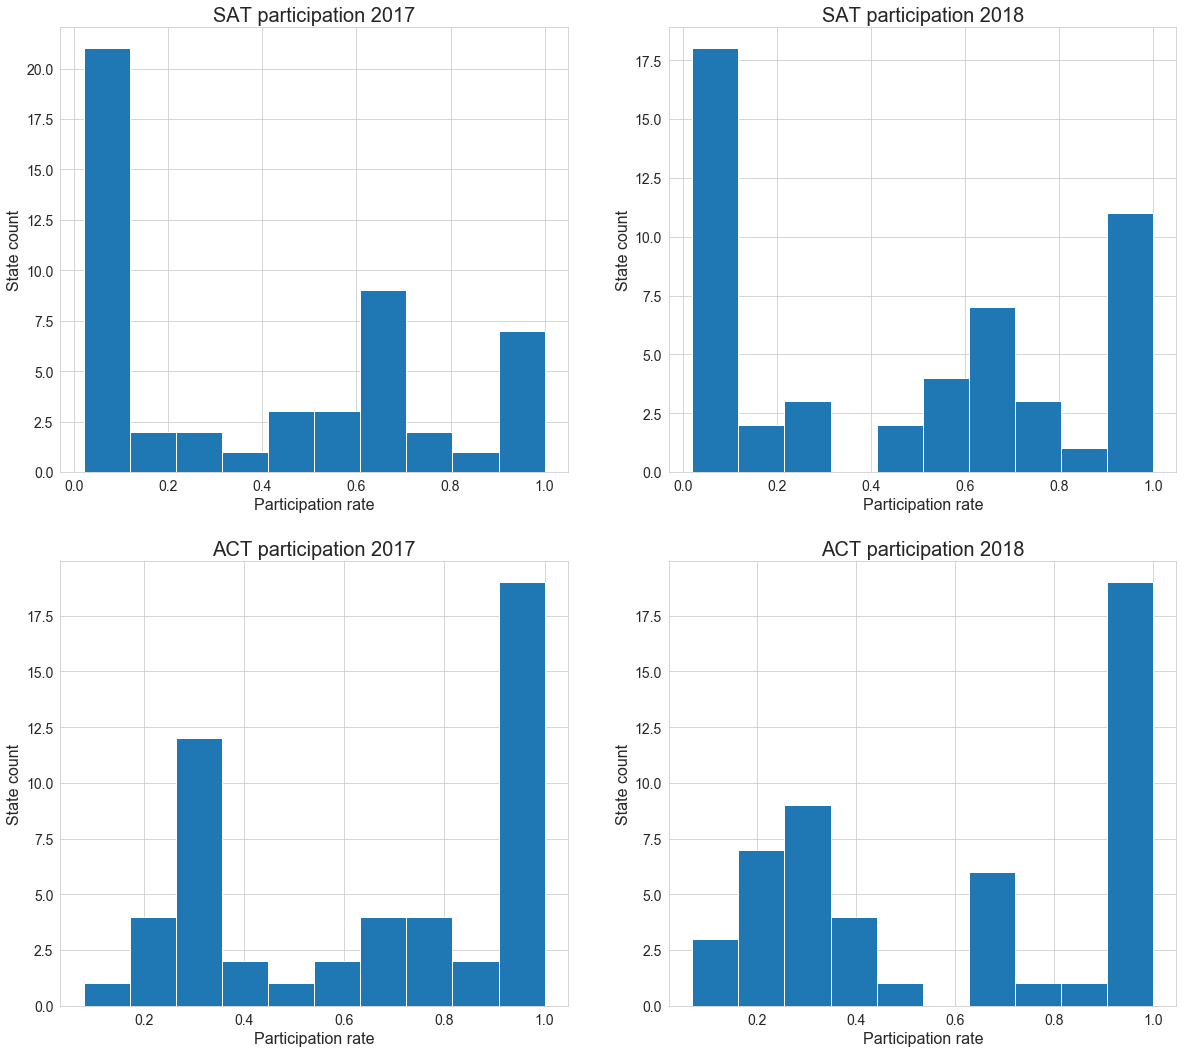

In [338]:
# Histograms of SAT and ACT participation in 2017 and 2018
subplot_histograms(final_df, 
                  ["sat_part_2017", "sat_part_2018","act_part_2017", "act_part_2018" ], 
                  ["SAT participation 2017", "SAT participation 2018","ACT participation 2017", "ACT participation 2018"],
                  ["Participation rate", "Participation rate","Participation rate", "Participation rate"],
                  ["State count", "State count", "State count", "State count"],
                  (20,18), 
                  10)


### Participation rates

Histograms of 2017 and 2018 participation rates shows the difference in test participation and provides a view into how these rates have changed year over year.  Both tests show bimodal tendency in which states have either high (near 100%) or low (below 30%) participation but little in between.  Very few states have 50% participation on both tests.  Low participation was prevalent with the SAT with 18 states near zero in 2018.  In contrast, 18 states had over 90% participation in the ACT in 2018.  

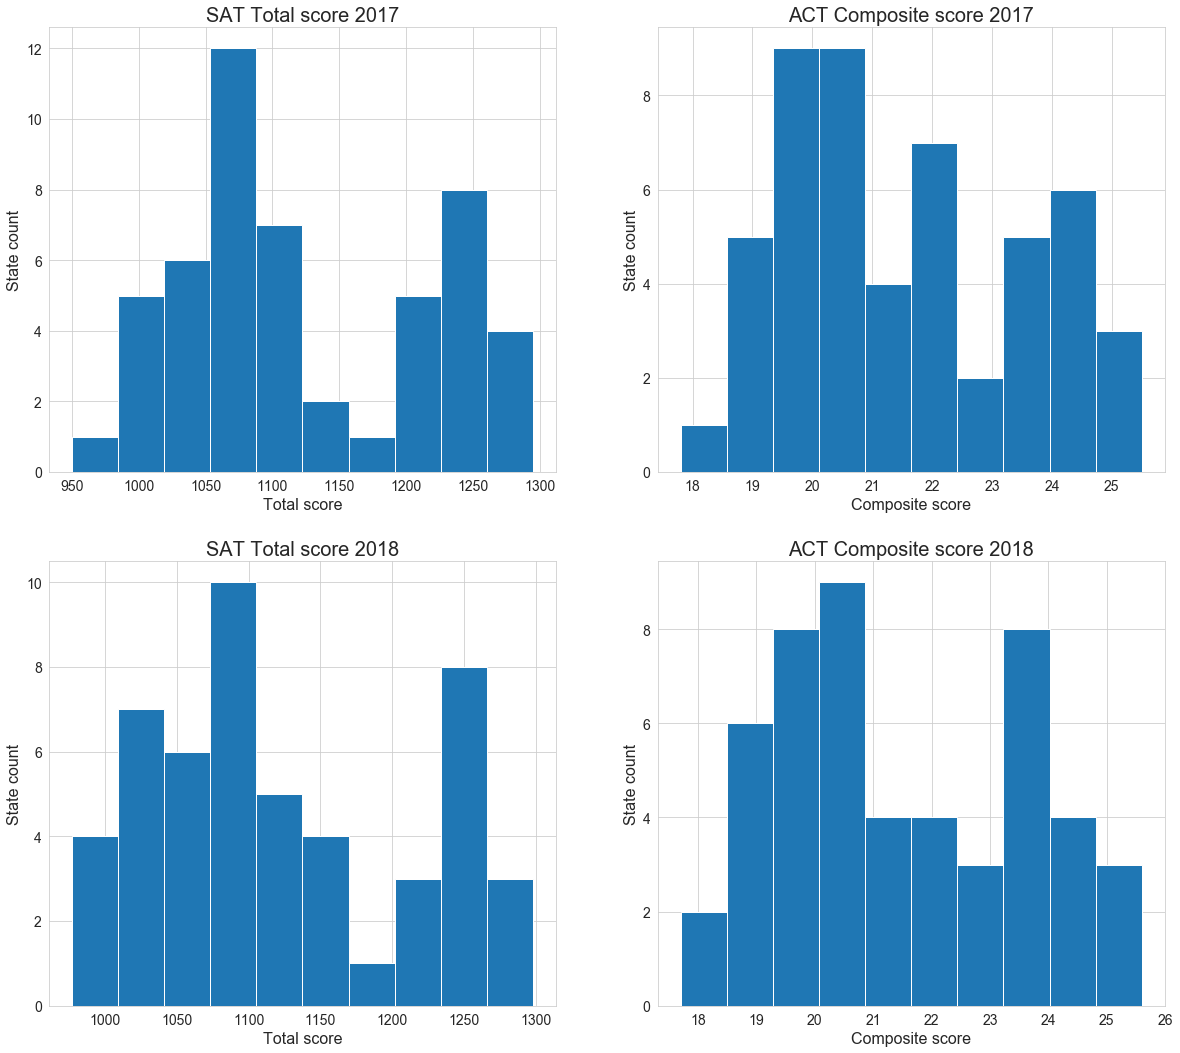

In [366]:
# Histograms of SAT Total and ACT Composite scores in 2017 and 2018
subplot_histograms(final_df, 
                  ["sat_total_2017", "act_comp_2017", "sat_total_2018", "act_comp_2018" ], 
                  ["SAT Total score 2017", "ACT Composite score 2017","SAT Total score 2018", "ACT Composite score 2018"],
                  ["Total score", "Composite score","Total score", "Composite score"],
                  ["State count", "State count","State count", "State count"],
                  (20,18), 
                  10)


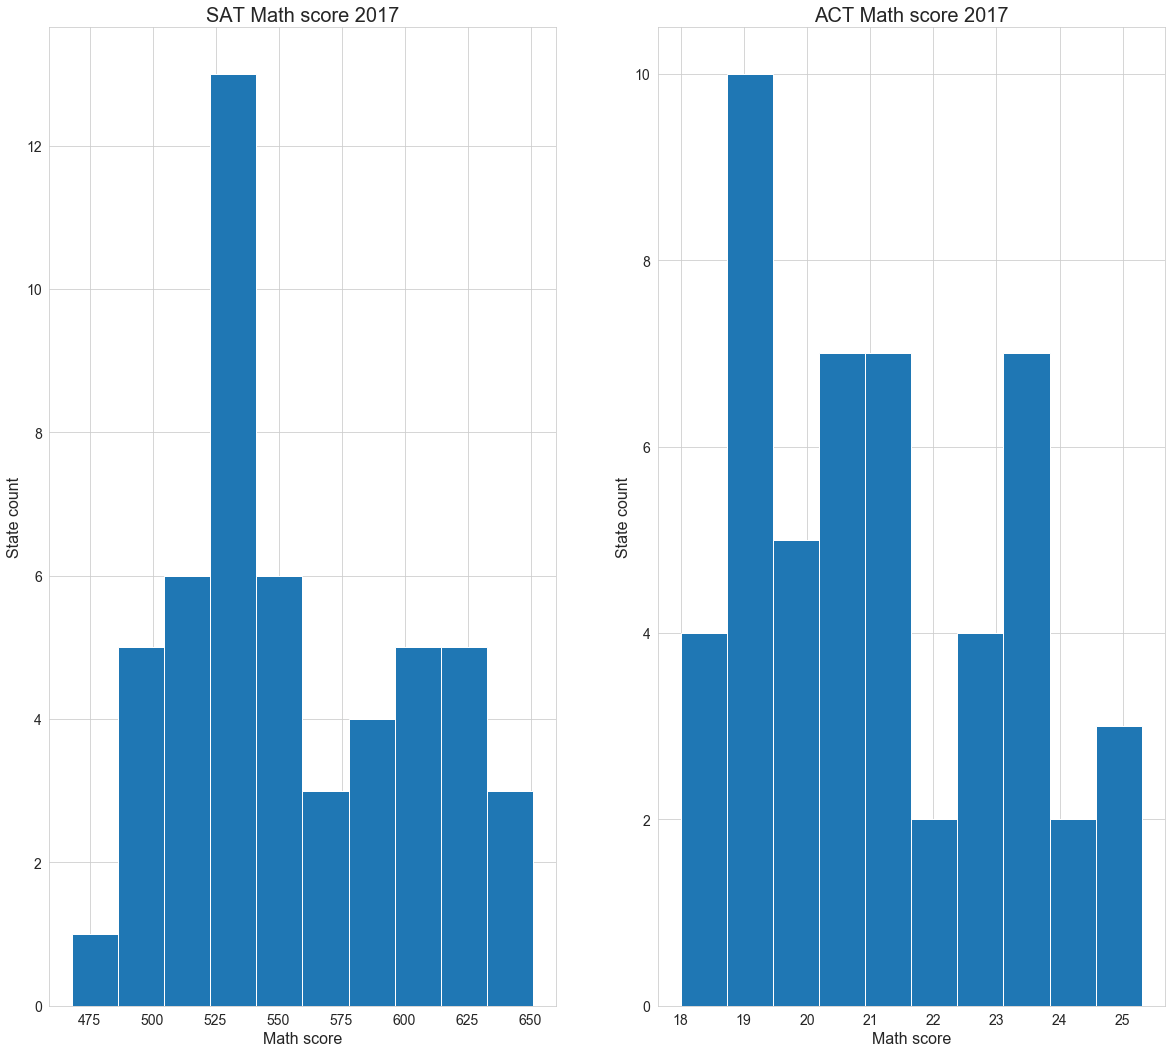

In [337]:
# Histograms of SAT and ACT math scores in 2017
subplot_histograms(final_df, 
                  ["sat_math_2017", "act_math_2017"], 
                  ["SAT Math score 2017", "ACT Math score 2017"],
                  ["Math score", "Math score"],
                  ["State count", "State count"],
                  (20,18), 
                  10)


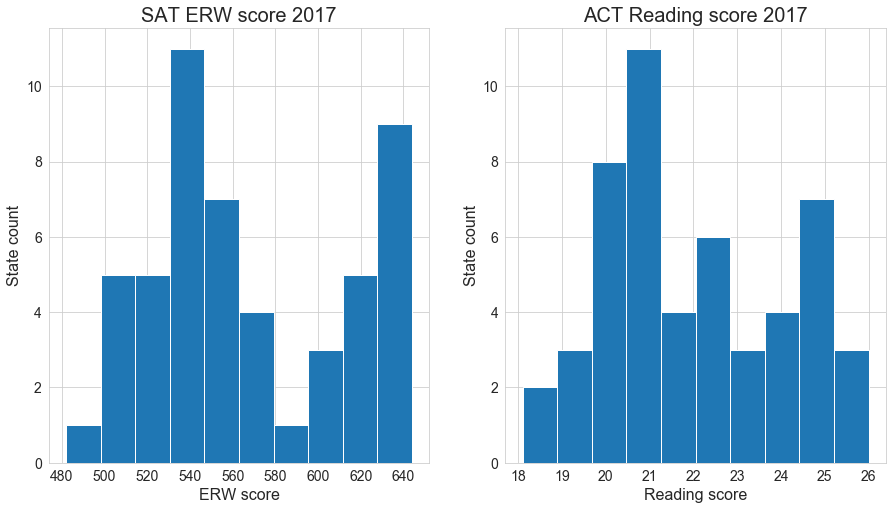

In [359]:
# Histograms of SAT and ACT math scores in 2017
subplot_histograms(final_df, 
                  ["sat_erw_2017", "act_read_2017"], 
                  ["SAT ERW score 2017", "ACT Reading score 2017"],
                  ["ERW score", "Reading score"],
                  ["State count", "State count"],
                  (15,8), 
                  10)


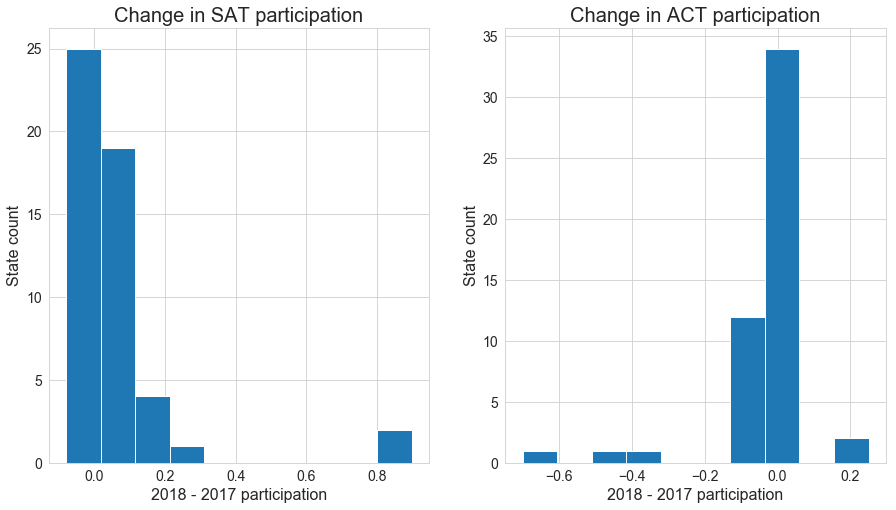

In [363]:
# Histograms of change in SAT and ACT participation 2018 less 2017
subplot_histograms(final_df, 
                  ["sat_change_part_17_to_18", "act_change_part_17_to_18"], 
                  ["Change in SAT participation", "Change in ACT participation"],
                  ["2018 - 2017 participation", "2018 - 2017 participation"],
                  ["State count", "State count"],
                  (15,8), 
                  10)


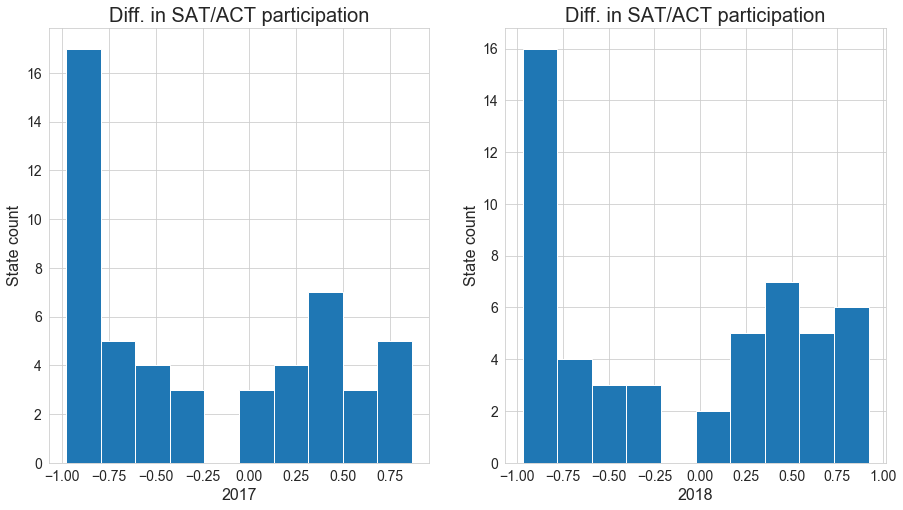

In [364]:
# Histograms of change in SAT and ACT participation 2018 less 2017
subplot_histograms(final_df, 
                  ["sat_act_part_2017", "sat_act_part_2018"], 
                  ["Diff. in SAT/ACT participation", "Diff. in SAT/ACT participation"],
                  ["2017", "2018"],
                  ["State count", "State count"],
                  (15,8), 
                  10)


### Scores

Histograms of 2017 and 2018 SAT and ACT Math, ERW and Reading scores show a somewhat even distribution across states.  To see such a range is surprising and could be explained by the varying participation rates. 

#### Plot and interpret scatter plots

For each of the following:
- SAT vs. ACT math scores for 2017
- SAT vs. ACT verbal/reading scores for 2017
- SAT vs. ACT total/composite scores for 2017
- Total scores for SAT 2017 vs. 2018
- Composite scores for ACT 2017 vs. 2018

Plot the two variables against each other using matplotlib or Seaborn

Your plots should show:
- Two clearly labeled axes
- A proper title
- Using colors and symbols that are clear and unmistakable

**Feel free to write a custom function, and subplot if you'd like.** Functions save both time and space.


In [312]:
# Function to create sub plots of type scatter
def create_scatter(df, x_list, y_list, title_list, xlabel_list, ylabel_list, figsize):
    if len(x_list) != len(y_list):
        raise ValueError ("x and y must be the same length")
    
    # Determine the number of rows
    nrows = int(np.ceil(len(x_list)/2))
    
    # Determine the number of cols
    if len(x_list) == 1:
        ncols = 1
    else:
        ncols = 2
    
    # Create the figure and plot objects
    fig, ax = plt.subplots(nrows = nrows, ncols = ncols, figsize = figsize)
    
    if ncols == 1:
        ax.scatter(x=df[x_list[0]],y=df[y_list[0]], s = 50)
        ax.set_title(title_list[0], fontsize = 20)
        ax.set_ylabel(ylabel_list[0], fontsize = 16)
        ax.set_xlabel(xlabel_list[0], fontsize = 16)
        ax.tick_params(axis="x", labelsize=14)
        ax.tick_params(axis="y", labelsize=14)
    else:    
        # Loop through each x_list and y_list
        for i, x in enumerate(x_list):
            ax[i].scatter(x=df[x],y=df[y_list[i]], s = 50)
            ax[i].set_title(title_list[i], fontsize = 20)
            ax[i].set_ylabel(ylabel_list[i], fontsize = 16)
            ax[i].set_xlabel(xlabel_list[i], fontsize = 16)
            ax[i].tick_params(axis="x", labelsize=14)
            ax[i].tick_params(axis="y", labelsize=14)
            

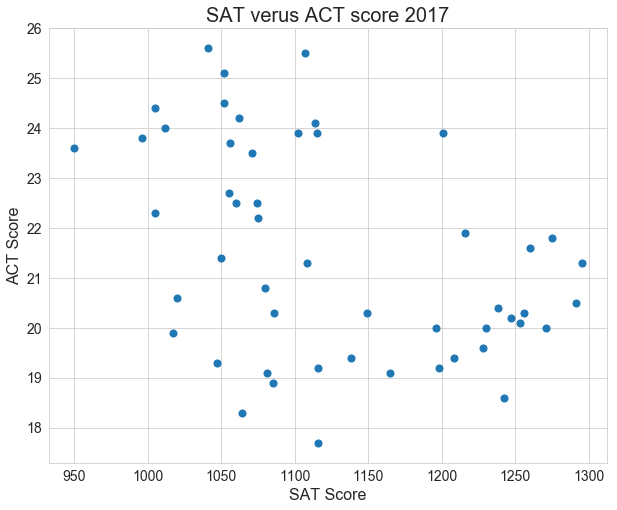

In [335]:
# Scatter plot showing SAT and ACT participation versus score
create_scatter(final_df, 
               ["sat_total_2017"], 
               ["act_comp_2018"], 
               ["SAT verus ACT score 2017"], 
               ["SAT Score"],
               ["ACT Score"], 
               (10,8))


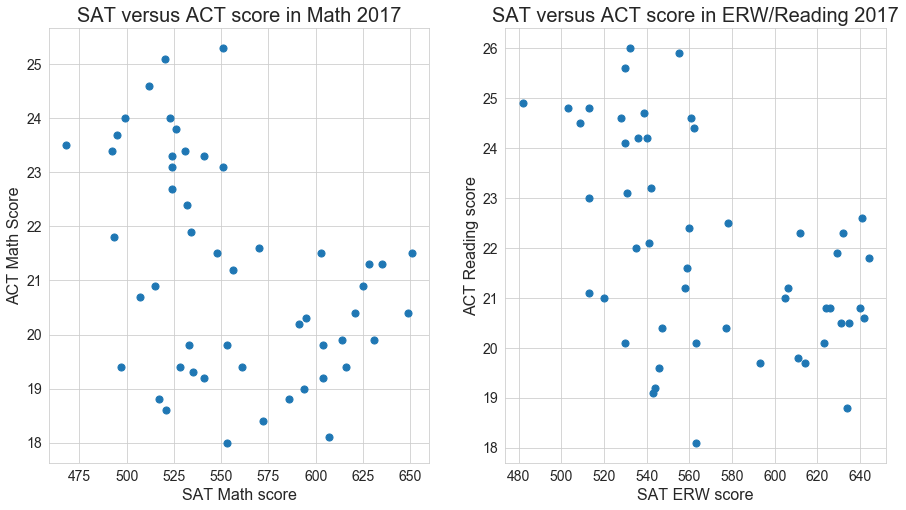

In [334]:
# Scatter plot showing SAT and ACT participation versus score
create_scatter(final_df, 
               ["sat_math_2017", "sat_erw_2017"], 
               ["act_math_2017", "act_read_2017"], 
               ["SAT versus ACT score in Math 2017", "SAT versus ACT score in ERW/Reading 2017"], 
               ["SAT Math score", "SAT ERW score"],
               ["ACT Math Score", "ACT Reading score"], 
               (15,8))


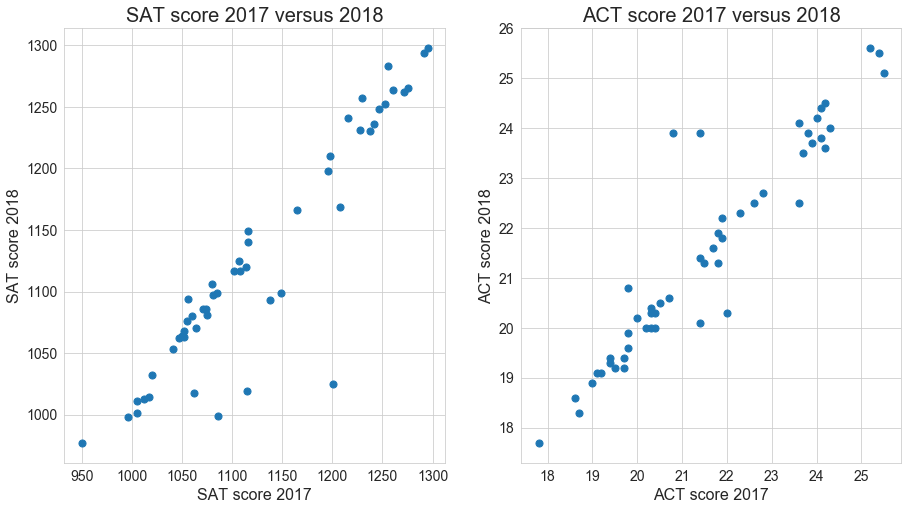

In [333]:
# Scatter plot showing SAT and ACT participation versus score
create_scatter(final_df, 
               ["sat_total_2017", "act_comp_2017"], 
               ["sat_total_2018", "act_comp_2018"], 
               ["SAT score 2017 versus 2018", "ACT score 2017 versus 2018"], 
               ["SAT score 2017", "ACT score 2017"],
               ["SAT score 2018", "ACT score 2018"], 
               (15,8))


### Scores

SAT and ACT scores displayt somewhat of a negative correlation indicating that higher SAT scores are associated with lower ACT scores.  This is counter intuitive and warrants further investigation.  One explanation may be found in the participation rates.  These state-by-state averages are heavily influenced by participation rates with a negative correlation between participation and score.  Further, there is a negative correlation between SAT and ACT participation.  Combined these two influences make it difficult to draw conclusions from comparing scores between tests.

#### Plot and interpret boxplots

For each numeric variable in the dataframe create a boxplot using Seaborn. Boxplots demonstrate central tendency and spread in variables. In a certain sense, these are somewhat redundant with histograms, but you may be better able to identify clear outliers or differences in IQR, etc.

Multiple values can be plotted to a single boxplot as long as they are of the same relative scale (meaning they have similar min/max values).

Each boxplot should:
- Only include variables of a similar scale
- Have clear labels for each variable
- Have appropriate titles and labels

In [316]:
# Code
def two_boxplots(df_list, title_list, xlabel_list, ylabel_list, xticklabels_list, figsize):
    # create a 1 x 2 figure with two box plots
    fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = figsize)
    
    # for both data frames create boxplot
    for i in range(2):
        ax[i] = sns.boxplot(x="variable", y="value", data=pd.melt(df_list[i]), ax = ax[i])
        ax[i].set_title(title_list[i], fontsize = 20)
        ax[i].set_xlabel(xlabel_list[i], fontsize = 16)
        ax[i].set_ylabel(ylabel_list[i], fontsize = 16)
        ax[i].tick_params(axis="x", labelsize = 14)
        ax[i].tick_params(axis="y", labelsize = 14)
        ax[i].set_xticklabels(xticklabels_list)

# Reference:
# https://stackoverflow.com/questions/49554139/boxplot-of-multiple-columns-of-a-pandas-dataframe-on-the-same-figure-seaborn  

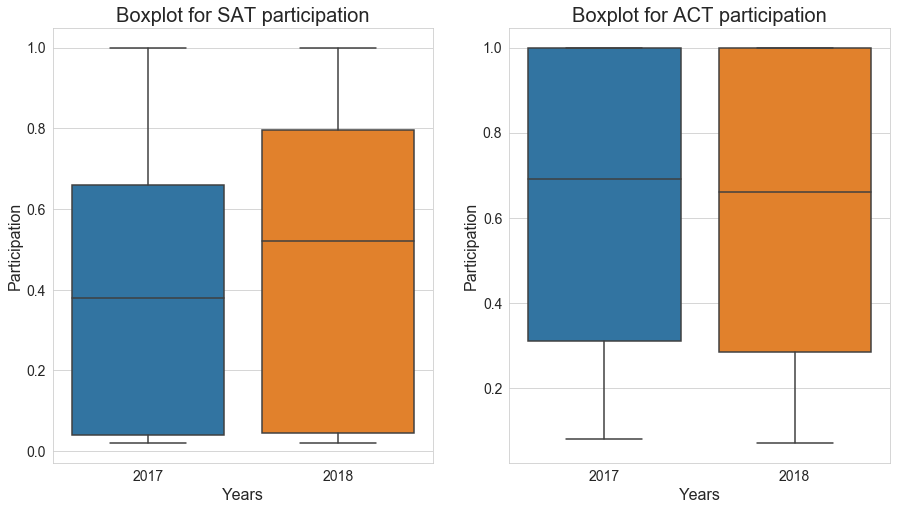

In [325]:
# Box plots for SAT and ACT participation
two_boxplots([final_df[["sat_part_2017","sat_part_2018"]],final_df[["act_part_2017","act_part_2018"]]],
             ["Boxplot for SAT participation", "Boxplot for ACT participation"],
             ["Years", "Years"], 
             ["Participation","Participation"], 
             ["2017","2018"], 
             (15,8))


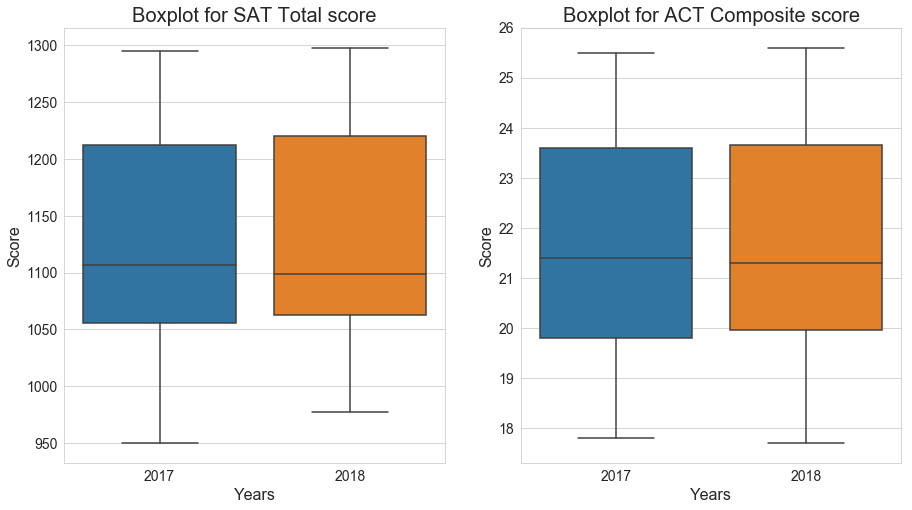

In [326]:
# Boxplots for SAT Total and ACT Composite scores
two_boxplots([final_df[["sat_total_2017","sat_total_2018"]],final_df[["act_comp_2017","act_comp_2018"]]],
             ["Boxplot for SAT Total score", "Boxplot for ACT Composite score"],
             ["Years", "Years"], 
             ["Score","Score"], 
             ["2017","2018"], 
             (15,8))


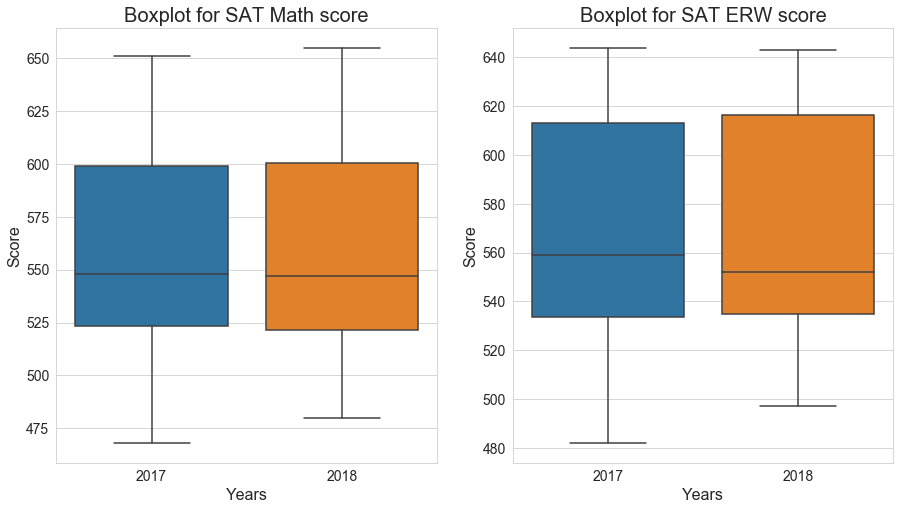

In [328]:
# Boxplot for SAT Math and ERW score
two_boxplots([final_df[["sat_math_2017","sat_math_2018"]], final_df[["sat_erw_2017","sat_erw_2018"]]],
             ["Boxplot for SAT Math score", "Boxplot for SAT ERW score"],
             ["Years", "Years"], 
             ["Score","Score"], 
             ["2017","2018"],
             (15,8))


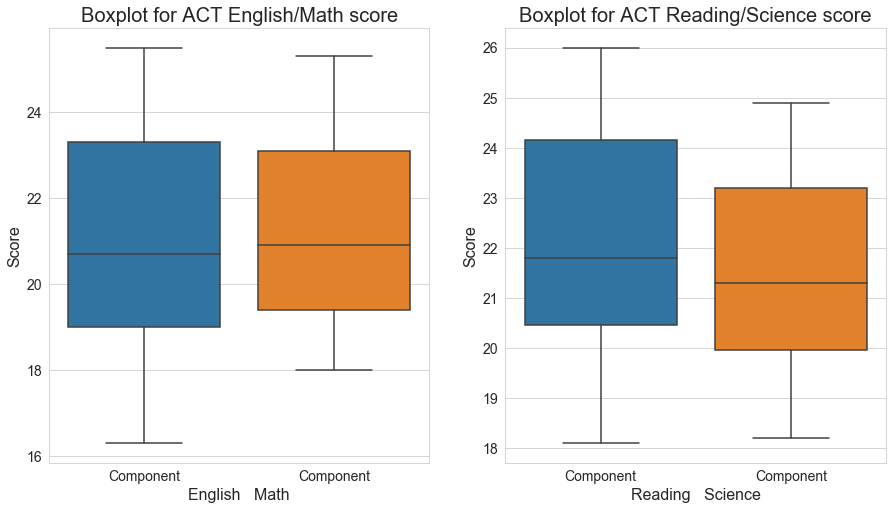

In [331]:
# Box plots for ACT component scores
two_boxplots([final_df[["act_eng_2017", "act_math_2017"]], final_df[["act_read_2017", "act_sci_2017"]]],
            ["Boxplot for ACT English/Math score", "Boxplot for ACT Reading/Science score"],
            ["English   Math", "Reading   Science"], 
            ["Score","Score"], 
            ["Component","Component"]
            ,(15,8))


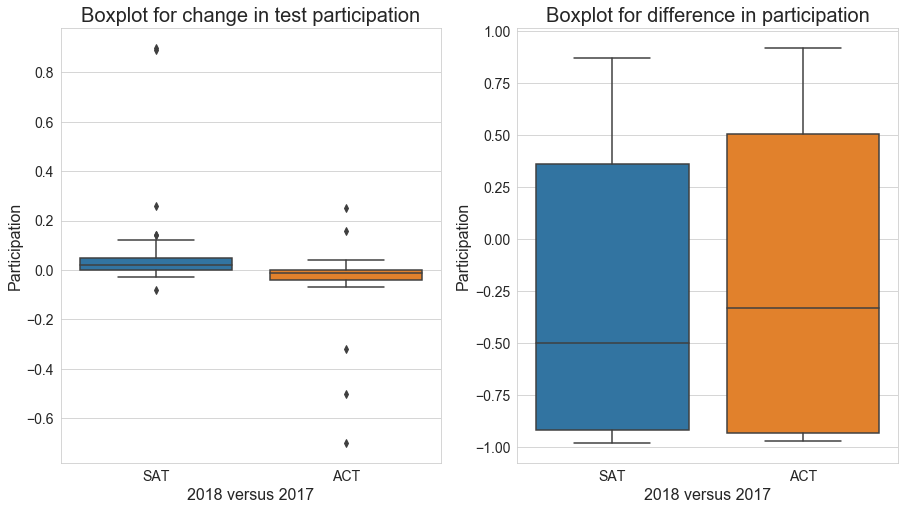

In [332]:
# Boxplots for change and difference in participation 
two_boxplots([final_df[["sat_change_part_17_to_18","act_change_part_17_to_18"]], final_df[["sat_act_part_2017","sat_act_part_2018"]]],
            ["Boxplot for change in test participation", "Boxplot for difference in participation"],
            ["2018 versus 2017", "2018 versus 2017"], 
            ["Participation","Participation"], 
            ["SAT","ACT"],
            (15,8))


Index(['state', 'sat_part_2017', 'sat_erw_2017', 'sat_math_2017',
       'sat_total_2017', 'act_part_2017', 'act_eng_2017', 'act_math_2017',
       'act_read_2017', 'act_sci_2017', 'act_comp_2017', 'sat_part_2018',
       'sat_erw_2018', 'sat_math_2018', 'sat_total_2018', 'act_part_2018',
       'act_comp_2018', 'sat_change_part_17_to_18', 'act_change_part_17_to_18',
       'sat_act_part_2017', 'sat_act_part_2018'],
      dtype='object')
      


#### Feel free to do additional plots below
*(do research and choose your own chart types & variables)*

Are there any additional trends or relationships you haven't explored? Was there something interesting you saw that you'd like to dive further into? It's likely that there are a few more plots you might want to generate to support your narrative and recommendations that you are building toward. **As always, make sure you're interpreting your plots as you go**.

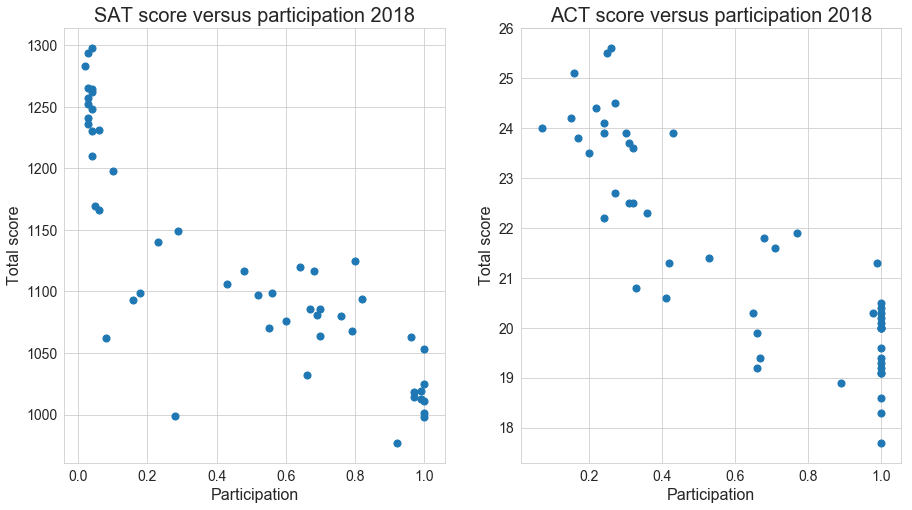

In [339]:
# Scatter plot showing SAT and ACT participation versus score
create_scatter(final_df, 
               ["sat_part_2018", "act_part_2018"], 
               ["sat_total_2018", "act_comp_2018"], 
               ["SAT score versus participation 2018", "ACT score versus participation 2018"], 
               ["Participation", "Participation"],
               ["Total score", "Total score"], 
               (15,8))


In [ ]:
# Create a new datafameCreate a chart 

#### (Optional): Using Tableau, create a choropleth map for each variable using a map of the US. 

Save this plot as an image file in an images directory, provide a relative path, and insert the image into notebook in markdown.

## Descriptive and Inferential Statistics

#### Summarizing Distributions

Above, we used pandas `describe` to provide quick summary statistics of our numeric columns. We also demonstrated many visual relationships.

As data scientists, having a complete understanding of data is imperative prior to modeling.

While we will continue to build our analytic tools, we know that measures of *central tendency*, *spread*, and *shape/skewness* provide a quick summary of distributions.

For each variable in your data, summarize the underlying distributions (in words & statistics)
 - Be thorough in your verbal description of these distributions.
 - Be sure to back up these summaries with statistics.

In [361]:
final_df.describe().T

,count,mean,std,min,25%,50%,75%,max
sat_part_2017,51.0,0.398039,0.352766,0.02,0.040,0.38,0.660,1.00
sat_erw_2017,51.0,569.117647,45.666901,482.00,533.500,559.00,613.000,644.00
sat_math_2017,51.0,556.882353,47.121395,468.00,523.500,548.00,599.000,651.00
sat_total_2017,51.0,1126.098039,92.494812,950.00,1055.500,1107.00,1212.000,1295.00
act_part_2017,51.0,0.652549,0.321408,0.08,0.310,0.69,1.000,1.00
act_eng_2017,51.0,20.931373,2.353677,16.30,19.000,20.70,23.300,25.50
act_math_2017,51.0,21.182353,1.981989,18.00,19.400,20.90,23.100,25.30
act_read_2017,51.0,22.013725,2.067271,18.10,20.450,21.80,24.150,26.00
act_sci_2017,51.0,21.450980,1.739353,18.20,19.950,21.30,23.200,24.90
act_comp_2017,51.0,21.519608,2.020695,17.80,19.800,21.40,23.600,25.50


## Distributions

The following table summarizes observations about the distribution.  Please refer to the table above for statistics on mean, standard deviation, Inner Quartile Range and range of values for each numeric data column.  

|Feature|Theoretical range|Description|
|-------|-----------------|-----------|
|state|non-numeric|State label| 
|sat_part_2017|0 to 1|bimodal and left-skew characteristics|
|sat_erw_2017|200 to 800|bimodal characteristics|
|sat_math_2017|200 to 800|bimodal characteristics|
|sat_total_2017|400 to 1600|bimodal characteristics|
|act_part_2017|0 to 1|bimodal and right-skew characteristics|
|act_eng_2017|1 to 36|bimodal and right-skew characteristics|
|act_math_2017|1 to 36|bimodal and right-skew characteristics|
|act_read_2017|1 to 36|bimodal and right-skew characteristics|
|act_sci_2017|1 to 36|bimodal and right-skew characteristics|
|act_comp_2017|1 to 36|bimodal and right-skew characteristics|
|sat_part_2018|0 to 1|bimodal and left-skew characteristics|
|sat_erw_2018|200 to 800|bimodal characteristics|
|sat_math_2018|200 to 800|bimodal characteristics|
|sat_total_2018|400 to 1600|bimodal characteristics|
|act_part_2018|0 to 1|bimodal and right-skew characteristics|
|act_comp_2018|1 to 36|bimodal and right-skew characteristics|
|sat_change_part_17_to_18|-1 to 1|Centered around 0|
|act_change_part_17_to_1|-1 to 1|Centered around 0|
|sat_act_part_2017|-1 to 1|Skewed to -1|
|sat_act_part_2017|-1 to 1|Skewed to -1|

#### We generally assuming that data we sample from a population will be normally distributed. Do we observe this trend?

From reviewing the histograms above, it does not appear that any of these series closely follow a Normal distribution.  

The histograms of the participation rates reveal data that do not seem to be centrally distributed around a mean.  In addition, it is worth noting that participation rates are bound in the interval 0 to 1 and these data have several observations close to these limits with several states near zero SAT participation and several states with 100% ACT participation.  Such distributions of data away from the mean and close to the limits are not consistent with that of the normal.  

The score data are state means and under the Central Limit Theorem (CLT) such means approach a Normal as sampling sizes increase.  Under the CLT, this would be true even if the underlying samples are not themselves Normally distributed.  However, one must proceed with caution with these data sets.  In this case, one must consider sampling bias in the way students in some states decide to participate or not in selected tests. These data exhibit a high negative correlation between participation rates and scores and states have a wide range of participation rates varying from nearly 0% to over 90%.  Therefore, the samples and thus the averages from high-participation-rate states can not be considered similar to those from low-participation-rate states.  This makes any comparisons across states unreliable.  For example, we can not conclude that students in a high-score state are smarter than those in a low-score state since there is selection bais resulting from the difference in participation rates.  Note the distribution plots with Kernel Density Etimates (KDE) estimates in the charts below.  These show distributions that do nopt visually follow a Normal.

However, we can use the CLT to test hypothesis and build confidence intervals for the average or mean across all states which we might call the distribution of the national average.



/Users/stephengodfrey/anaconda3/envs/dsi/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


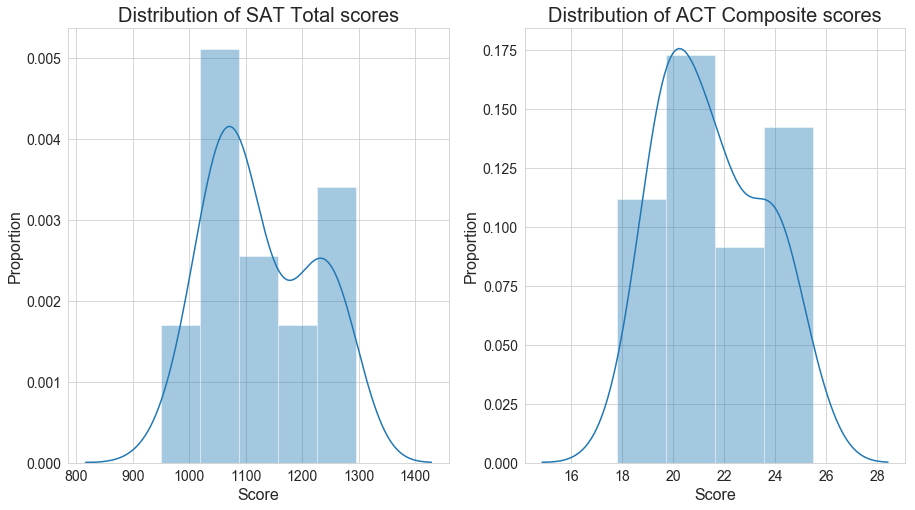

In [396]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (15,8))
ax[0] = sns.distplot(final_df["sat_total_2017"], 
                     ax = ax[0])
ax[0].set_title("Distribution of SAT Total scores", fontsize = 20)
ax[0].set_xlabel("Score", fontsize = 16)
ax[0].set_ylabel("Proportion", fontsize = 16)
ax[0].tick_params(axis="x", labelsize = 14)
ax[0].tick_params(axis="y", labelsize = 14)

ax[1] = sns.distplot(final_df["act_comp_2017"], 
                     ax = ax[1])
ax[1].set_title("Distribution of ACT Composite scores", fontsize = 20)
ax[1].set_xlabel("Score", fontsize = 16)
ax[1].set_ylabel("Proportion", fontsize = 16)
ax[1].tick_params(axis="x", labelsize = 14)
ax[1].tick_params(axis="y", labelsize = 14)


Does This Assumption Hold for:
    - Math
    - Reading
    - Rates
Explain your answers for each distribution and how you think this will affect estimates made from these data.

We have concluded that because of selection bias in state-by-state test participation the score probability distributions are unlikely to follow a Normal.  Therefore, any state-level estimates relying on an assumption of normality can not be relied upon.  However, we can build confidence levels for the national average.

#### Estimate Limits of Data

Suppose we only seek to understand the relationship between SAT and ACT participation rates in 2017. 

##### Does it make sense to conduct statistical inference given these data specifically? 

Why or why not?

*(think about granularity, aggregation, the relationships between populations size & rates...consider the actually populations these data describe in answering this question)*

Since it is highly unlikely that the test participation rates follow a Normal distribution, statistical inference comparisons between the two variables that rely on the Normal are not valid.  Information can be gathered from a direct comparison of the two, but no conclusions based on an assumption of underlying normality can be drawn.

##### Is it appropriate to compare *these* specific SAT and ACT math scores? 

Why or why not?

In 2017, the average SAT Math score was 556 and the average ACT Math score was 21.18.  These two values can not be directly compared since they come from two different tests scored under two different methodologies.

#### Statistical Evaluation of Distributions 

**If you feel it's appropriate**, using methods we discussed in class, run hypothesis tests to compare variables of interest in our dataset. 

In [409]:
# Build a 95% confidence Interval for the national average
def conf_inter_95(d_ser):
    if len(d_ser) == 0:
        raise ValueError("Len of input must be greater than zero")
    return d_ser.mean() - 1.96 * d_ser.std()/np.sqrt(len(d_ser)), d_ser.mean() + 1.96 * d_ser.std()/np.sqrt(len(d_ser))


In [417]:
# print a confidence interval for the national SAT average
print("2017 national SAT Total average 95%% confidence interval: %.2f, %.2f" % \
      conf_inter_95(final_df["sat_total_2017"]))

# print a confidence interval for the national ACT average
print("2017 national ACT Composite average 95%% confidence interval: %.2f, %.2f" % \
      conf_inter_95(final_df["act_comp_2017"]))


2017 national SAT Total average 95% confidence interval: 1100.71, 1151.48
2017 national ACT Composite average 95% confidence interval: 20.97, 22.07


## Outside Research

Based upon your observations, choose **three** states that demonstrate interesting trends in their SAT and/or ACT participation rates. Spend some time doing outside research on state policies that might influence these rates, and summarize your findings below. **Feel free to go back and create new plots that highlight these states of interest**. If you bring in any outside tables or charts, make sure you are explicit about having borrowed them. If you quote any text, make sure that it renders as being quoted. (Make sure that you cite your sources -- check with you local instructor for citation preferences).

## Conclusions and Recommendations

Based on your exploration of the data, what are you key takeaways and recommendations? Choose one state with a lower participation rate and provide a suggestion for how the College Board might increase participation amongst graduating seniors in this state. Are there additional data you desire that would better inform your investigations?